# Machine Learning Engineer Nanodegree
## General imports

In [3]:
#Installing yahoo finance module
!pip install yfinance
import yfinance as yf
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime
import os
import json
import matplotlib
matplotlib.rcParams["figure.figsize"] = [10, 6]

    100% |████████████████████████████████| 20.2MB 2.1MB/s eta 0:00:01
  Running setup.py bdist_wheel for yfinance ... done
  Stored in directory: /home/ec2-user/.cache/pip/wheels/f9/e3/5b/ec24dd2984b12d61e0abf26289746c2436a0e7844f26f2515c
  Running setup.py bdist_wheel for multitasking ... done
  Stored in directory: /home/ec2-user/.cache/pip/wheels/37/fa/73/d492849e319038eb4d986f5152e4b19ffb1bc0639da84d2677
Successfully built yfinance multitasking
  Found existing installation: numpy 1.14.6
    Uninstalling numpy-1.14.6:
      Successfully uninstalled numpy-1.14.6
You are using pip version 10.0.1, however version 20.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


## Data Exploration
The stock dataset of the problem is made of the following main European Stock Indices

|Ticker|Index|Country|
|---|---|---|
|^FTSE|FTSE 100|England|
|^N100|Euronext 100|Europe|
|^FCHI|CAC 40|France|
|^GDAXI|DAX|Germany|
|^SSMI|Swiss Market Index|Switzerland|



In [4]:
ticker_list = ['^FTSE', #England
          '^N100', #Europe
          '^FCHI', #France
         '^GDAXI', #German
          '^SSMI' #Swiss
         ]

#Definition of the dataset time window
start_date='2010-01-01'
end_date='2020-04-28'

#Downloading the whole dataset
dataset = yf.download(ticker_list, start=start_date, 
                      end=end_date, 
                      progress=False)

### Data Analyses
#### Stocks Data
Data for `^FTSE`

In [5]:
yf.download(ticker_list[0], start=start_date, 
                      end=end_date, 
                      progress=False).head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,5412.899902,5500.299805,5410.799805,5500.299805,5500.299805,750942000
2010-01-05,5500.299805,5536.399902,5480.700195,5522.500000,5522.500000,1149301200
2010-01-06,5522.500000,5536.500000,5497.700195,5530.000000,5530.000000,998295300
2010-01-07,5530.000000,5551.700195,5499.799805,5526.700195,5526.700195,1162933700
2010-01-08,5526.700195,5549.299805,5494.799805,5534.200195,5534.200195,1006420600


Statistics on the whole dataset on the `Adj Close`

In [6]:
dataset = dataset['Adj Close']
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
^FCHI,2635.0,4439.090338,769.757224,2781.679932,3838.660034,4391.500000,5117.479980,6111.240234
^FTSE,2600.0,6517.021535,724.781606,4805.799805,5885.274902,6605.099854,7164.175049,7877.500000
^GDAXI,2612.0,9601.207649,2400.171326,5072.330078,7225.294922,9795.264648,11829.317627,13789.000000
^N100,2635.0,847.870132,162.153685,529.500000,699.154999,849.950012,995.795013,1182.099976
^SSMI,2590.0,8038.267254,1306.321163,4791.959961,6627.824951,8308.995117,8984.087158,11263.009766


Filling missing data with the average prices, due to the different business days.

In [7]:
dataset = dataset.fillna(method='ffill').fillna(method='bfill')

Definition of the scaled dataset using `MinMaxScaler`

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
dataset_scaled = dataset.copy()
scaler.fit(dataset_scaled)
dataset_scaled.iloc[:,:]=scaler.transform(dataset_scaled)

Since the `scaler` is calibrated on the whole dataset so the `inverse_transform` takes as input a vector with the features dimension. In some cases it is useful to apply the `inverse_transform` only to one dimension

In [9]:
def inverse_transform_single(scaler,X_scaled,idx):
    """
    Application of the scaler only to one dimension array
    Input:
        scaler: scaler calibrated
        X_scaled: 1-dimension array to be inverse-transformed
        idx: dimension to consider
    Output:
        1-dimension array which is inversed-transformed according the scaler
    """
    return (X_scaled-scaler.min_[idx])/scaler.scale_[idx]

## Data Visualization

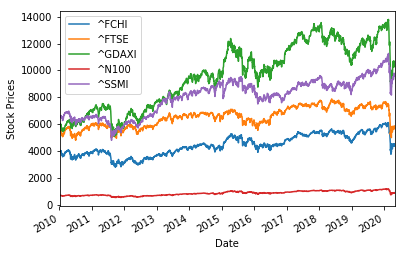

In [10]:
# stock prices dataset
f=dataset.plot()
_=f.legend(loc='upper left')
_=f.set_ylabel('Stock Prices')

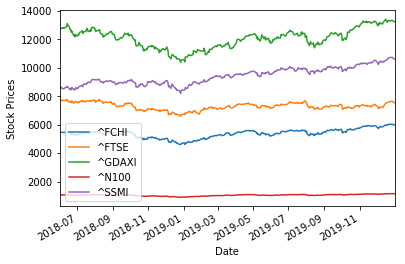

In [11]:
# stock prices training dataset
training_start = datetime.datetime.strptime('2018/06/01','%Y/%m/%d')
training_end = datetime.datetime.strptime('2019/12/31','%Y/%m/%d')
f=dataset[training_start:training_end].plot()
_=f.legend(loc='lower left')
_=f.set_ylabel('Stock Prices')

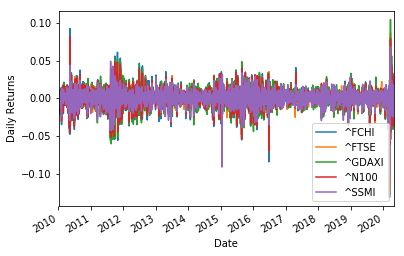

In [12]:
# daily log-return
daily_returns = np.log(dataset)-np.log(dataset.shift(1))
f=daily_returns.plot()
_=f.set_ylabel('Daily Returns')

Example of the `MinMaxScaler` application to the **^N100** index

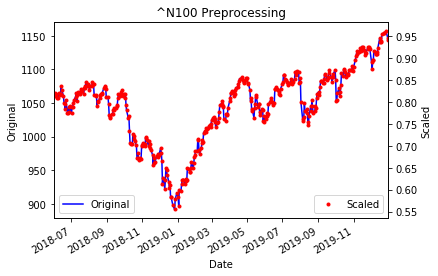

In [12]:
f,a=plt.subplots()
a.set_title("^N100 Preprocessing")
dataset[training_start:training_end]['^N100'].plot(ax=a,style=['b'])
_=a.set_ylabel('Original')
a1 = a.twinx()
dataset_scaled[training_start:training_end]['^N100'].plot(ax=a1,style=['r.'])
_=a1.set_ylabel('Scaled')
_=a1.legend(['Scaled'],loc='lower right')
_=a.legend(['Original'],loc='lower left')


Application of the `MinMaxScaler` to the whole perimeter

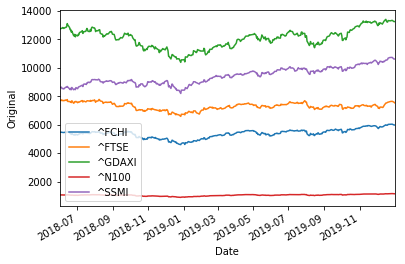

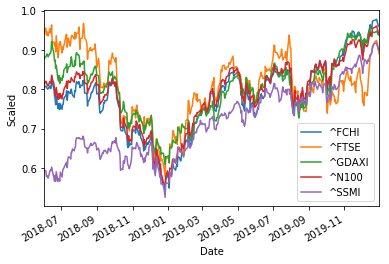

In [13]:
f=dataset[training_start:training_end].plot()
_=f.legend(loc='lower left')
_=f.set_ylabel('Original')
f=dataset_scaled[training_start:training_end].plot()
_=f.legend(loc='lower right')
_=f.set_ylabel('Scaled')

## Benchmark - Keras SimpleRNN
### Data Preprocessing 
Using a predition period of `30` days (1-month horizon), the training and testing datasets are built using a period of 30-days for the training test X and the 30-day observation for the training test Y

In [14]:
train_X = []
train_Y = []
calibration_dataset = dataset_scaled[training_start:training_end]
for i in range(len(calibration_dataset.index)-30):
    train_X.append(calibration_dataset.iloc[i:i+30,:].values.tolist())
    train_Y.append(calibration_dataset.iloc[i+30,:].values.tolist())
train_X=np.array(train_X)
train_Y= np.array(train_Y)
train_X=train_X.reshape((train_X.shape))
train_Y=train_Y.reshape((train_Y.shape))
print(train_X.shape)
print(train_Y.shape)

(376, 30, 5)
(376, 5)


Definition of the `Keras` network through the 3 layers: `LSTM`, `Dropout` and `Dense`

In [16]:
from keras.models import Sequential
from keras.layers import SimpleRNN, LSTM, Dropout, Dense

model = Sequential()
model.add(LSTM(units = 50, input_shape = (train_X.shape[1], train_X.shape[2])))
model.add(Dropout(0.2))

model.add(Dense(units = train_X.shape[2]))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

model.fit(train_X, train_Y, epochs = 1000, batch_size = 32)

Epoch 1/1000
376/376 [==============================] - 1s 1ms/step - loss: 0.1794
Epoch 2/1000
376/376 [==============================] - 0s 338us/step - loss: 0.0455
Epoch 3/1000
376/376 [==============================] - 0s 354us/step - loss: 0.0316
Epoch 4/1000
376/376 [==============================] - 0s 362us/step - loss: 0.0256
Epoch 5/1000
376/376 [==============================] - 0s 354us/step - loss: 0.0231
Epoch 6/1000
376/376 [==============================] - 0s 356us/step - loss: 0.0221
Epoch 7/1000
376/376 [==============================] - 0s 356us/step - loss: 0.0211
Epoch 8/1000
376/376 [==============================] - 0s 353us/step - loss: 0.0186
Epoch 9/1000
376/376 [==============================] - 0s 361us/step - loss: 0.0178
Epoch 10/1000
376/376 [==============================] - 0s 352us/step - loss: 0.0168
Epoch 11/1000
376/376 [==============================] - 0s 358us/step - loss: 0.0148
Epoch 12/1000
376/376 [==============================] - 0s 357us

376/376 [==============================] - 0s 370us/step - loss: 0.0023
Epoch 191/1000
376/376 [==============================] - 0s 354us/step - loss: 0.0022
Epoch 192/1000
376/376 [==============================] - 0s 359us/step - loss: 0.0022
Epoch 193/1000
376/376 [==============================] - 0s 355us/step - loss: 0.0021
Epoch 194/1000
376/376 [==============================] - 0s 358us/step - loss: 0.0021
Epoch 195/1000
376/376 [==============================] - 0s 361us/step - loss: 0.0021
Epoch 196/1000
376/376 [==============================] - 0s 370us/step - loss: 0.0018
Epoch 197/1000
376/376 [==============================] - 0s 382us/step - loss: 0.0020
Epoch 198/1000
376/376 [==============================] - 0s 355us/step - loss: 0.0022
Epoch 199/1000
376/376 [==============================] - 0s 358us/step - loss: 0.0020
Epoch 200/1000
376/376 [==============================] - 0s 357us/step - loss: 0.0018
Epoch 201/1000
376/376 [==============================] - 

376/376 [==============================] - 0s 367us/step - loss: 7.5195e-04
Epoch 376/1000
376/376 [==============================] - 0s 359us/step - loss: 6.9606e-04
Epoch 377/1000
376/376 [==============================] - 0s 360us/step - loss: 7.1202e-04
Epoch 378/1000
376/376 [==============================] - 0s 358us/step - loss: 6.7517e-04
Epoch 379/1000
376/376 [==============================] - 0s 360us/step - loss: 7.0034e-04
Epoch 380/1000
376/376 [==============================] - 0s 375us/step - loss: 6.9164e-04
Epoch 381/1000
376/376 [==============================] - 0s 364us/step - loss: 7.0133e-04
Epoch 382/1000
376/376 [==============================] - 0s 355us/step - loss: 6.7236e-04
Epoch 383/1000
376/376 [==============================] - 0s 358us/step - loss: 7.3153e-04
Epoch 384/1000
376/376 [==============================] - 0s 358us/step - loss: 7.0387e-04
Epoch 385/1000
376/376 [==============================] - 0s 354us/step - loss: 7.7202e-04
Epoch 386/1000

376/376 [==============================] - 0s 365us/step - loss: 3.8518e-04
Epoch 556/1000
376/376 [==============================] - 0s 357us/step - loss: 3.5558e-04
Epoch 557/1000
376/376 [==============================] - 0s 345us/step - loss: 3.7662e-04
Epoch 558/1000
376/376 [==============================] - 0s 360us/step - loss: 3.9091e-04
Epoch 559/1000
376/376 [==============================] - 0s 368us/step - loss: 3.8693e-04
Epoch 560/1000
376/376 [==============================] - 0s 365us/step - loss: 3.7363e-04
Epoch 561/1000
376/376 [==============================] - 0s 358us/step - loss: 3.7004e-04
Epoch 562/1000
376/376 [==============================] - 0s 361us/step - loss: 3.9005e-04
Epoch 563/1000
376/376 [==============================] - 0s 354us/step - loss: 3.7285e-04
Epoch 564/1000
376/376 [==============================] - 0s 347us/step - loss: 3.5612e-04
Epoch 565/1000
376/376 [==============================] - 0s 360us/step - loss: 3.8775e-04
Epoch 566/1000

376/376 [==============================] - 0s 360us/step - loss: 2.8856e-04
Epoch 736/1000
376/376 [==============================] - 0s 358us/step - loss: 3.1929e-04
Epoch 737/1000
376/376 [==============================] - 0s 366us/step - loss: 3.1619e-04
Epoch 738/1000
376/376 [==============================] - 0s 346us/step - loss: 3.2763e-04
Epoch 739/1000
376/376 [==============================] - 0s 351us/step - loss: 3.4700e-04
Epoch 740/1000
376/376 [==============================] - 0s 356us/step - loss: 3.5927e-04
Epoch 741/1000
376/376 [==============================] - 0s 353us/step - loss: 3.3172e-04
Epoch 742/1000
376/376 [==============================] - 0s 359us/step - loss: 3.0250e-04
Epoch 743/1000
376/376 [==============================] - 0s 356us/step - loss: 3.2280e-04
Epoch 744/1000
376/376 [==============================] - 0s 347us/step - loss: 3.2225e-04
Epoch 745/1000
376/376 [==============================] - 0s 361us/step - loss: 3.0578e-04
Epoch 746/1000

376/376 [==============================] - 0s 357us/step - loss: 2.7331e-04
Epoch 916/1000
376/376 [==============================] - 0s 347us/step - loss: 2.9506e-04
Epoch 917/1000
376/376 [==============================] - 0s 363us/step - loss: 2.8416e-04
Epoch 918/1000
376/376 [==============================] - 0s 363us/step - loss: 2.8047e-04
Epoch 919/1000
376/376 [==============================] - 0s 356us/step - loss: 2.6226e-04
Epoch 920/1000
376/376 [==============================] - 0s 349us/step - loss: 2.8493e-04
Epoch 921/1000
376/376 [==============================] - 0s 350us/step - loss: 2.8422e-04
Epoch 922/1000
376/376 [==============================] - 0s 366us/step - loss: 3.0377e-04
Epoch 923/1000
376/376 [==============================] - 0s 361us/step - loss: 3.1722e-04
Epoch 924/1000
376/376 [==============================] - 0s 374us/step - loss: 2.9012e-04
Epoch 925/1000
376/376 [==============================] - 0s 362us/step - loss: 2.8042e-04
Epoch 926/1000

Valuation of the `mean_squared_error`

In [17]:
LSTM_MSE = model.evaluate(train_X, train_Y,batch_size=128,verbose=2)
print(model.loss,LSTM_MSE)

mean_squared_error 0.0001896098996091515


Performance check on the whole perimeter

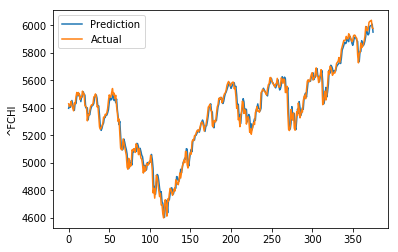

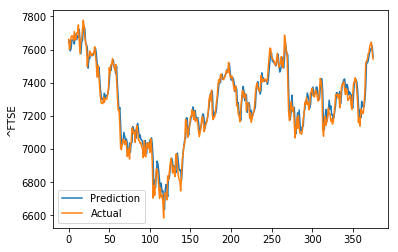

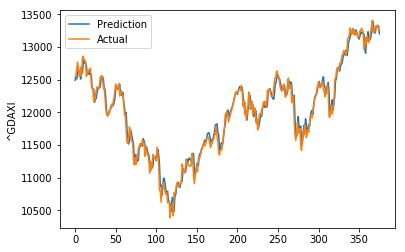

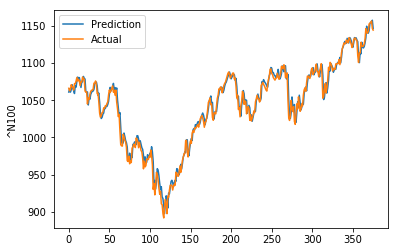

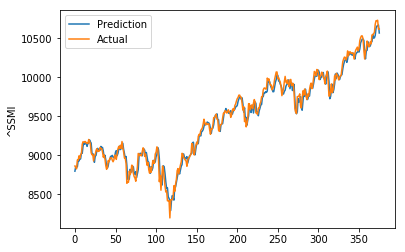

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
prediction = scaler.inverse_transform(model.predict(train_X))
actual = scaler.inverse_transform(train_Y)
for i,ticker in enumerate(dataset.columns):
    _=plt.figure()
    _=plt.plot(prediction[:,i])
    _=plt.plot(actual[:,i])
    _=plt.ylabel(ticker)
    _=plt.legend(['Prediction','Actual']) 

## DeepAR Model
### Data Preprocessing

Creating local JSON format which are required by the DeepAR model

In [19]:
def convert_series_to_JSON(serie,cat=[0]):
    """
    Generation of the JSON format
    Input:
        serie: time-serie to be converted
        cat: category of the serie
    Output:
        serie converted in the JSON format 
    """
    return {'start': str(serie.index[0]), 'target':serie.tolist(), 'cat' : cat}

Example of application of the `convert_series_to_JSON` function for **^FCHI**

In [20]:
stock = dataset.columns.tolist()[0]
convert_series_to_JSON(dataset.loc[training_start:training_end,stock],cat=[0])

{'start': '2018-06-01 00:00:00',
 'target': [5465.52978515625,
  5472.91015625,
  5460.9501953125,
  5457.56005859375,
  5448.35986328125,
  5450.22021484375,
  5473.91015625,
  5453.3701171875,
  5452.72998046875,
  5528.4599609375,
  5501.8798828125,
  5450.47998046875,
  5390.6298828125,
  5372.31005859375,
  5316.009765625,
  5387.3798828125,
  5283.85986328125,
  5281.2900390625,
  5327.2001953125,
  5275.64013671875,
  5323.52978515625,
  5276.759765625,
  5316.77001953125,
  5320.5,
  5366.31982421875,
  5375.77001953125,
  5398.10986328125,
  5434.35986328125,
  5353.93017578125,
  5405.89990234375,
  5429.2001953125,
  5409.43017578125,
  5422.5400390625,
  5447.43994140625,
  5417.06982421875,
  5398.31982421875,
  5378.25,
  5434.18994140625,
  5426.41015625,
  5480.5498046875,
  5511.759765625,
  5491.22021484375,
  5511.2998046875,
  5498.3701171875,
  5460.97998046875,
  5478.97998046875,
  5477.18017578125,
  5521.31005859375,
  5501.89990234375,
  5502.25,
  5414.680175

Definition of the local files for training and testing

In [21]:
data_dir = 'stock_prices'
if not os.path.exists(data_dir):
    os.makedirs(data_dir)

In [22]:
train_file = os.path.join(data_dir,'train.json')
test_file = os.path.join(data_dir,'test.json')

Definition of the JSON file used for DeepAR

In [23]:
def create_JSON_from_dataframe(df,file,stock_in = None):
    if os.path.exists(file):
        os.remove(file)
    f = open(file,'a')
    for i,stock in enumerate(df.columns if stock_in is None else set(df.columns)&set(stock_in)):
        json.dump(convert_series_to_JSON(df.loc[:,stock],cat=[i]),f)
        f.write("\n")
    f.close()
    print('File {} created'.format(file))
    return 

In [24]:
create_JSON_from_dataframe(dataset_scaled[training_start:training_end].iloc[:-30],train_file)
create_JSON_from_dataframe(dataset_scaled[training_start:training_end],test_file)

File stock_prices/train.json created
File stock_prices/test.json created


Uploading JSON file to S3 storage

In [27]:
import boto3
import sagemaker
from sagemaker import get_execution_role

In [28]:
sagemaker_session = sagemaker.Session()
role = get_execution_role()
bucket = sagemaker_session.default_bucket()

In [29]:
s3_path = 'stock_prices'

train_S3 = '{}/{}'.format(s3_path, 'train')
test_S3 = '{}/{}'.format(s3_path, 'test')

In [30]:
train_path = sagemaker_session.upload_data(train_file, bucket=bucket, key_prefix=train_S3)
print("{} uploaded".format(train_path))
test_path = sagemaker_session.upload_data(test_file,  bucket=bucket, key_prefix=test_S3)
print("{} uploaded".format(test_path))

s3://sagemaker-us-east-2-032935472111/stock_prices/train/train.json uploaded
s3://sagemaker-us-east-2-032935472111/stock_prices/test/test.json uploaded


### Model training

In [31]:
from sagemaker.amazon.amazon_estimator import get_image_uri
image_name = get_image_uri(boto3.Session().region_name, # get the region
                           'forecasting-deepar') # specify image

Definition of the Estimator

In [32]:
from sagemaker.estimator import Estimator
s3_output_path = "s3://{}/{}/output".format(bucket, s3_path)
estimator = Estimator(sagemaker_session=sagemaker_session,
                      image_name=image_name,
                      role=role,
                      train_instance_count=1,
                      train_instance_type='ml.c4.xlarge',
                      output_path=s3_output_path
                      )

Definition of the hyperparameters

In [37]:
hyperparameters = {
    "epochs": "300",
    "time_freq": "D",
    "prediction_length": "30",
    "context_length": "30", #approx. 1 months and the same is used for prediction_length
    "num_cells": "50",
    "num_layers": "2",
    "mini_batch_size": "512",
    "learning_rate": "0.01",
    "early_stopping_patience": "30",
    "dropout_rate": '0.20',
    "num_eval_samples": "500",
    "likelihood": "gaussian"
}
estimator.set_hyperparameters(**hyperparameters)

In [38]:
data_channels = {
    "train": train_path,
    "test": test_path
}
estimator.fit(inputs=data_channels)

2020-05-14 17:36:46 Starting - Starting the training job...
2020-05-14 17:36:52 Starting - Launching requested ML instances......
2020-05-14 17:37:54 Starting - Preparing the instances for training...
2020-05-14 17:38:33 Downloading - Downloading input data...
2020-05-14 17:39:05 Training - Downloading the training image..Arguments: train
[05/14/2020 17:39:24 INFO 139666827089728] Reading default configuration from /opt/amazon/lib/python2.7/site-packages/algorithm/resources/default-input.json: {u'num_dynamic_feat': u'auto', u'dropout_rate': u'0.10', u'mini_batch_size': u'128', u'test_quantiles': u'[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]', u'_tuning_objective_metric': u'', u'_num_gpus': u'auto', u'num_eval_samples': u'100', u'learning_rate': u'0.001', u'num_cells': u'40', u'num_layers': u'2', u'embedding_dimension': u'10', u'_kvstore': u'auto', u'_num_kv_servers': u'auto', u'cardinality': u'auto', u'likelihood': u'student-t', u'early_stopping_patience': u''}
[05/14/2020 17:39:24 I

[05/14/2020 17:39:53 INFO 139666827089728] Epoch[3] Batch[0] avg_epoch_loss=-1.405002
[05/14/2020 17:39:53 INFO 139666827089728] #quality_metric: host=algo-1, epoch=3, batch=0 train loss <loss>=-1.40500223637
[05/14/2020 17:39:56 INFO 139666827089728] Epoch[3] Batch[5] avg_epoch_loss=-1.518866
[05/14/2020 17:39:56 INFO 139666827089728] #quality_metric: host=algo-1, epoch=3, batch=5 train loss <loss>=-1.51886641979
[05/14/2020 17:39:56 INFO 139666827089728] Epoch[3] Batch [5]#011Speed: 819.22 samples/sec#011loss=-1.518866
[05/14/2020 17:39:59 INFO 139666827089728] Epoch[3] Batch[10] avg_epoch_loss=-1.545053
[05/14/2020 17:39:59 INFO 139666827089728] #quality_metric: host=algo-1, epoch=3, batch=10 train loss <loss>=-1.576476717
[05/14/2020 17:39:59 INFO 139666827089728] Epoch[3] Batch [10]#011Speed: 816.51 samples/sec#011loss=-1.576477
[05/14/2020 17:39:59 INFO 139666827089728] processed a total of 5186 examples
#metrics {"Metrics": {"update.time": {"count": 1, "max": 8617.900848388672, 

[05/14/2020 17:40:34 INFO 139666827089728] Epoch[8] Batch[0] avg_epoch_loss=-1.604075
[05/14/2020 17:40:34 INFO 139666827089728] #quality_metric: host=algo-1, epoch=8, batch=0 train loss <loss>=-1.60407495499
[05/14/2020 17:40:37 INFO 139666827089728] Epoch[8] Batch[5] avg_epoch_loss=-1.698236
[05/14/2020 17:40:37 INFO 139666827089728] #quality_metric: host=algo-1, epoch=8, batch=5 train loss <loss>=-1.69823626677
[05/14/2020 17:40:37 INFO 139666827089728] Epoch[8] Batch [5]#011Speed: 828.15 samples/sec#011loss=-1.698236
[05/14/2020 17:40:41 INFO 139666827089728] Epoch[8] Batch[10] avg_epoch_loss=-1.783383
[05/14/2020 17:40:41 INFO 139666827089728] #quality_metric: host=algo-1, epoch=8, batch=10 train loss <loss>=-1.88555994034
[05/14/2020 17:40:41 INFO 139666827089728] Epoch[8] Batch [10]#011Speed: 823.78 samples/sec#011loss=-1.885560
[05/14/2020 17:40:41 INFO 139666827089728] processed a total of 5153 examples
#metrics {"Metrics": {"update.time": {"count": 1, "max": 8485.281944274902

[05/14/2020 17:41:24 INFO 139666827089728] Epoch[14] Batch[0] avg_epoch_loss=-1.940423
[05/14/2020 17:41:24 INFO 139666827089728] #quality_metric: host=algo-1, epoch=14, batch=0 train loss <loss>=-1.94042348862
[05/14/2020 17:41:28 INFO 139666827089728] Epoch[14] Batch[5] avg_epoch_loss=-2.023891
[05/14/2020 17:41:28 INFO 139666827089728] #quality_metric: host=algo-1, epoch=14, batch=5 train loss <loss>=-2.02389144897
[05/14/2020 17:41:28 INFO 139666827089728] Epoch[14] Batch [5]#011Speed: 825.86 samples/sec#011loss=-2.023891
[05/14/2020 17:41:31 INFO 139666827089728] Epoch[14] Batch[10] avg_epoch_loss=-2.066705
[05/14/2020 17:41:31 INFO 139666827089728] #quality_metric: host=algo-1, epoch=14, batch=10 train loss <loss>=-2.11808047295
[05/14/2020 17:41:31 INFO 139666827089728] Epoch[14] Batch [10]#011Speed: 827.07 samples/sec#011loss=-2.118080
[05/14/2020 17:41:31 INFO 139666827089728] processed a total of 5157 examples
#metrics {"Metrics": {"update.time": {"count": 1, "max": 8519.5949

[05/14/2020 17:42:07 INFO 139666827089728] Epoch[19] Batch[0] avg_epoch_loss=-1.765671
[05/14/2020 17:42:07 INFO 139666827089728] #quality_metric: host=algo-1, epoch=19, batch=0 train loss <loss>=-1.76567101479
[05/14/2020 17:42:10 INFO 139666827089728] Epoch[19] Batch[5] avg_epoch_loss=-1.801030
[05/14/2020 17:42:10 INFO 139666827089728] #quality_metric: host=algo-1, epoch=19, batch=5 train loss <loss>=-1.80102990071
[05/14/2020 17:42:10 INFO 139666827089728] Epoch[19] Batch [5]#011Speed: 831.86 samples/sec#011loss=-1.801030
[05/14/2020 17:42:13 INFO 139666827089728] Epoch[19] Batch[10] avg_epoch_loss=-1.877341
[05/14/2020 17:42:13 INFO 139666827089728] #quality_metric: host=algo-1, epoch=19, batch=10 train loss <loss>=-1.9689152956
[05/14/2020 17:42:13 INFO 139666827089728] Epoch[19] Batch [10]#011Speed: 814.90 samples/sec#011loss=-1.968915
[05/14/2020 17:42:13 INFO 139666827089728] processed a total of 5281 examples
#metrics {"Metrics": {"update.time": {"count": 1, "max": 8616.46389

[05/14/2020 17:42:56 INFO 139666827089728] Epoch[25] Batch[0] avg_epoch_loss=-2.114358
[05/14/2020 17:42:56 INFO 139666827089728] #quality_metric: host=algo-1, epoch=25, batch=0 train loss <loss>=-2.11435818672
[05/14/2020 17:42:59 INFO 139666827089728] Epoch[25] Batch[5] avg_epoch_loss=-2.208358
[05/14/2020 17:42:59 INFO 139666827089728] #quality_metric: host=algo-1, epoch=25, batch=5 train loss <loss>=-2.20835761229
[05/14/2020 17:42:59 INFO 139666827089728] Epoch[25] Batch [5]#011Speed: 836.53 samples/sec#011loss=-2.208358
[05/14/2020 17:43:03 INFO 139666827089728] Epoch[25] Batch[10] avg_epoch_loss=-2.238911
[05/14/2020 17:43:03 INFO 139666827089728] #quality_metric: host=algo-1, epoch=25, batch=10 train loss <loss>=-2.27557606697
[05/14/2020 17:43:03 INFO 139666827089728] Epoch[25] Batch [10]#011Speed: 813.72 samples/sec#011loss=-2.275576
[05/14/2020 17:43:03 INFO 139666827089728] processed a total of 5189 examples
#metrics {"Metrics": {"update.time": {"count": 1, "max": 8486.4628

[05/14/2020 17:43:46 INFO 139666827089728] Epoch[31] Batch[0] avg_epoch_loss=0.485451
[05/14/2020 17:43:46 INFO 139666827089728] #quality_metric: host=algo-1, epoch=31, batch=0 train loss <loss>=0.485451281071
[05/14/2020 17:43:49 INFO 139666827089728] Epoch[31] Batch[5] avg_epoch_loss=-1.064548
[05/14/2020 17:43:49 INFO 139666827089728] #quality_metric: host=algo-1, epoch=31, batch=5 train loss <loss>=-1.06454824408
[05/14/2020 17:43:49 INFO 139666827089728] Epoch[31] Batch [5]#011Speed: 831.13 samples/sec#011loss=-1.064548
[05/14/2020 17:43:52 INFO 139666827089728] processed a total of 5104 examples
#metrics {"Metrics": {"update.time": {"count": 1, "max": 7845.0798988342285, "sum": 7845.0798988342285, "min": 7845.0798988342285}}, "EndTime": 1589478232.167046, "Dimensions": {"Host": "algo-1", "Operation": "training", "Algorithm": "AWS/DeepAR"}, "StartTime": 1589478224.321416}

[05/14/2020 17:43:52 INFO 139666827089728] #throughput_metric: host=algo-1, train throughput=650.584243693 re

[05/14/2020 17:44:37 INFO 139666827089728] Epoch[37] Batch[5] avg_epoch_loss=-1.872242
[05/14/2020 17:44:37 INFO 139666827089728] #quality_metric: host=algo-1, epoch=37, batch=5 train loss <loss>=-1.87224197388
[05/14/2020 17:44:37 INFO 139666827089728] Epoch[37] Batch [5]#011Speed: 828.23 samples/sec#011loss=-1.872242
[05/14/2020 17:44:40 INFO 139666827089728] Epoch[37] Batch[10] avg_epoch_loss=-1.978528
[05/14/2020 17:44:40 INFO 139666827089728] #quality_metric: host=algo-1, epoch=37, batch=10 train loss <loss>=-2.10607013702
[05/14/2020 17:44:40 INFO 139666827089728] Epoch[37] Batch [10]#011Speed: 830.77 samples/sec#011loss=-2.106070
[05/14/2020 17:44:40 INFO 139666827089728] processed a total of 5143 examples
#metrics {"Metrics": {"update.time": {"count": 1, "max": 8488.933801651001, "sum": 8488.933801651001, "min": 8488.933801651001}}, "EndTime": 1589478280.616167, "Dimensions": {"Host": "algo-1", "Operation": "training", "Algorithm": "AWS/DeepAR"}, "StartTime": 1589478272.126816}

[05/14/2020 17:45:16 INFO 139666827089728] Epoch[42] Batch[0] avg_epoch_loss=-2.289414
[05/14/2020 17:45:16 INFO 139666827089728] #quality_metric: host=algo-1, epoch=42, batch=0 train loss <loss>=-2.28941392899
[05/14/2020 17:45:19 INFO 139666827089728] Epoch[42] Batch[5] avg_epoch_loss=-2.194722
[05/14/2020 17:45:19 INFO 139666827089728] #quality_metric: host=algo-1, epoch=42, batch=5 train loss <loss>=-2.19472163916
[05/14/2020 17:45:19 INFO 139666827089728] Epoch[42] Batch [5]#011Speed: 831.71 samples/sec#011loss=-2.194722
[05/14/2020 17:45:22 INFO 139666827089728] Epoch[42] Batch[10] avg_epoch_loss=-2.227551
[05/14/2020 17:45:22 INFO 139666827089728] #quality_metric: host=algo-1, epoch=42, batch=10 train loss <loss>=-2.2669470787
[05/14/2020 17:45:22 INFO 139666827089728] Epoch[42] Batch [10]#011Speed: 822.62 samples/sec#011loss=-2.266947
[05/14/2020 17:45:22 INFO 139666827089728] processed a total of 5230 examples
#metrics {"Metrics": {"update.time": {"count": 1, "max": 8525.22802

[05/14/2020 17:46:07 INFO 139666827089728] Epoch[48] Batch[0] avg_epoch_loss=-0.974050
[05/14/2020 17:46:07 INFO 139666827089728] #quality_metric: host=algo-1, epoch=48, batch=0 train loss <loss>=-0.974050283432
[05/14/2020 17:46:10 INFO 139666827089728] Epoch[48] Batch[5] avg_epoch_loss=-1.848369
[05/14/2020 17:46:10 INFO 139666827089728] #quality_metric: host=algo-1, epoch=48, batch=5 train loss <loss>=-1.84836904208
[05/14/2020 17:46:10 INFO 139666827089728] Epoch[48] Batch [5]#011Speed: 834.00 samples/sec#011loss=-1.848369
[05/14/2020 17:46:13 INFO 139666827089728] Epoch[48] Batch[10] avg_epoch_loss=-1.963596
[05/14/2020 17:46:13 INFO 139666827089728] #quality_metric: host=algo-1, epoch=48, batch=10 train loss <loss>=-2.10186905861
[05/14/2020 17:46:13 INFO 139666827089728] Epoch[48] Batch [10]#011Speed: 807.91 samples/sec#011loss=-2.101869
[05/14/2020 17:46:13 INFO 139666827089728] processed a total of 5190 examples
#metrics {"Metrics": {"update.time": {"count": 1, "max": 8561.094

[05/14/2020 17:46:56 INFO 139666827089728] Epoch[54] Batch[0] avg_epoch_loss=-2.121835
[05/14/2020 17:46:56 INFO 139666827089728] #quality_metric: host=algo-1, epoch=54, batch=0 train loss <loss>=-2.12183499336
[05/14/2020 17:46:59 INFO 139666827089728] Epoch[54] Batch[5] avg_epoch_loss=-2.277965
[05/14/2020 17:46:59 INFO 139666827089728] #quality_metric: host=algo-1, epoch=54, batch=5 train loss <loss>=-2.27796455224
[05/14/2020 17:46:59 INFO 139666827089728] Epoch[54] Batch [5]#011Speed: 823.63 samples/sec#011loss=-2.277965
[05/14/2020 17:47:02 INFO 139666827089728] Epoch[54] Batch[10] avg_epoch_loss=-2.294129
[05/14/2020 17:47:02 INFO 139666827089728] #quality_metric: host=algo-1, epoch=54, batch=10 train loss <loss>=-2.31352581978
[05/14/2020 17:47:02 INFO 139666827089728] Epoch[54] Batch [10]#011Speed: 817.00 samples/sec#011loss=-2.313526
[05/14/2020 17:47:02 INFO 139666827089728] processed a total of 5187 examples
#metrics {"Metrics": {"update.time": {"count": 1, "max": 8516.8340

[05/14/2020 17:47:41 INFO 139666827089728] Epoch[59] Batch[5] avg_epoch_loss=-1.894791
[05/14/2020 17:47:41 INFO 139666827089728] #quality_metric: host=algo-1, epoch=59, batch=5 train loss <loss>=-1.8947908779
[05/14/2020 17:47:41 INFO 139666827089728] Epoch[59] Batch [5]#011Speed: 836.24 samples/sec#011loss=-1.894791
[05/14/2020 17:47:44 INFO 139666827089728] Epoch[59] Batch[10] avg_epoch_loss=-1.974055
[05/14/2020 17:47:44 INFO 139666827089728] #quality_metric: host=algo-1, epoch=59, batch=10 train loss <loss>=-2.06917152405
[05/14/2020 17:47:44 INFO 139666827089728] Epoch[59] Batch [10]#011Speed: 807.22 samples/sec#011loss=-2.069172
[05/14/2020 17:47:44 INFO 139666827089728] processed a total of 5205 examples
#metrics {"Metrics": {"update.time": {"count": 1, "max": 8555.25803565979, "sum": 8555.25803565979, "min": 8555.25803565979}}, "EndTime": 1589478464.767519, "Dimensions": {"Host": "algo-1", "Operation": "training", "Algorithm": "AWS/DeepAR"}, "StartTime": 1589478456.211669}

[0

[05/14/2020 17:48:27 INFO 139666827089728] Epoch[65] Batch[0] avg_epoch_loss=-2.233570
[05/14/2020 17:48:27 INFO 139666827089728] #quality_metric: host=algo-1, epoch=65, batch=0 train loss <loss>=-2.23356986046
[05/14/2020 17:48:30 INFO 139666827089728] Epoch[65] Batch[5] avg_epoch_loss=-2.228622
[05/14/2020 17:48:30 INFO 139666827089728] #quality_metric: host=algo-1, epoch=65, batch=5 train loss <loss>=-2.22862156232
[05/14/2020 17:48:30 INFO 139666827089728] Epoch[65] Batch [5]#011Speed: 833.81 samples/sec#011loss=-2.228622
[05/14/2020 17:48:34 INFO 139666827089728] Epoch[65] Batch[10] avg_epoch_loss=-2.294690
[05/14/2020 17:48:34 INFO 139666827089728] #quality_metric: host=algo-1, epoch=65, batch=10 train loss <loss>=-2.37397303581
[05/14/2020 17:48:34 INFO 139666827089728] Epoch[65] Batch [10]#011Speed: 827.63 samples/sec#011loss=-2.373973
[05/14/2020 17:48:34 INFO 139666827089728] processed a total of 5214 examples
#metrics {"Metrics": {"update.time": {"count": 1, "max": 8468.0171

[05/14/2020 17:49:22 INFO 139666827089728] processed a total of 5083 examples
#metrics {"Metrics": {"update.time": {"count": 1, "max": 7873.00705909729, "sum": 7873.00705909729, "min": 7873.00705909729}}, "EndTime": 1589478562.391872, "Dimensions": {"Host": "algo-1", "Operation": "training", "Algorithm": "AWS/DeepAR"}, "StartTime": 1589478554.517625}

[05/14/2020 17:49:22 INFO 139666827089728] #throughput_metric: host=algo-1, train throughput=645.611897795 records/second
[05/14/2020 17:49:22 INFO 139666827089728] #progress_metric: host=algo-1, completed 24 % of epochs
[05/14/2020 17:49:22 INFO 139666827089728] #quality_metric: host=algo-1, epoch=71, train loss <loss>=-2.34491996765
[05/14/2020 17:49:22 INFO 139666827089728] loss did not improve
[05/14/2020 17:49:24 INFO 139666827089728] Epoch[72] Batch[0] avg_epoch_loss=-2.445810
[05/14/2020 17:49:24 INFO 139666827089728] #quality_metric: host=algo-1, epoch=72, batch=0 train loss <loss>=-2.44581031799
[05/14/2020 17:49:27 INFO 13966682

[05/14/2020 17:50:08 INFO 139666827089728] Epoch[77] Batch[5] avg_epoch_loss=-2.416023
[05/14/2020 17:50:08 INFO 139666827089728] #quality_metric: host=algo-1, epoch=77, batch=5 train loss <loss>=-2.41602305571
[05/14/2020 17:50:08 INFO 139666827089728] Epoch[77] Batch [5]#011Speed: 834.89 samples/sec#011loss=-2.416023
[05/14/2020 17:50:11 INFO 139666827089728] Epoch[77] Batch[10] avg_epoch_loss=-2.377900
[05/14/2020 17:50:11 INFO 139666827089728] #quality_metric: host=algo-1, epoch=77, batch=10 train loss <loss>=-2.33215227127
[05/14/2020 17:50:11 INFO 139666827089728] Epoch[77] Batch [10]#011Speed: 821.94 samples/sec#011loss=-2.332152
[05/14/2020 17:50:11 INFO 139666827089728] processed a total of 5140 examples
#metrics {"Metrics": {"update.time": {"count": 1, "max": 8491.463899612427, "sum": 8491.463899612427, "min": 8491.463899612427}}, "EndTime": 1589478611.760384, "Dimensions": {"Host": "algo-1", "Operation": "training", "Algorithm": "AWS/DeepAR"}, "StartTime": 1589478603.26853}


[05/14/2020 17:50:50 INFO 139666827089728] Epoch[82] Batch[5] avg_epoch_loss=-2.300563
[05/14/2020 17:50:50 INFO 139666827089728] #quality_metric: host=algo-1, epoch=82, batch=5 train loss <loss>=-2.30056333542
[05/14/2020 17:50:50 INFO 139666827089728] Epoch[82] Batch [5]#011Speed: 825.42 samples/sec#011loss=-2.300563
[05/14/2020 17:50:53 INFO 139666827089728] processed a total of 5115 examples
#metrics {"Metrics": {"update.time": {"count": 1, "max": 7820.465803146362, "sum": 7820.465803146362, "min": 7820.465803146362}}, "EndTime": 1589478653.018339, "Dimensions": {"Host": "algo-1", "Operation": "training", "Algorithm": "AWS/DeepAR"}, "StartTime": 1589478645.197323}

[05/14/2020 17:50:53 INFO 139666827089728] #throughput_metric: host=algo-1, train throughput=654.040291501 records/second
[05/14/2020 17:50:53 INFO 139666827089728] #progress_metric: host=algo-1, completed 27 % of epochs
[05/14/2020 17:50:53 INFO 139666827089728] #quality_metric: host=algo-1, epoch=82, train loss <loss>=

[05/14/2020 17:51:33 INFO 139666827089728] processed a total of 4978 examples
#metrics {"Metrics": {"update.time": {"count": 1, "max": 7878.170967102051, "sum": 7878.170967102051, "min": 7878.170967102051}}, "EndTime": 1589478693.831568, "Dimensions": {"Host": "algo-1", "Operation": "training", "Algorithm": "AWS/DeepAR"}, "StartTime": 1589478685.952863}

[05/14/2020 17:51:33 INFO 139666827089728] #throughput_metric: host=algo-1, train throughput=631.857962638 records/second
[05/14/2020 17:51:33 INFO 139666827089728] #progress_metric: host=algo-1, completed 29 % of epochs
[05/14/2020 17:51:33 INFO 139666827089728] #quality_metric: host=algo-1, epoch=87, train loss <loss>=-2.45415832996
[05/14/2020 17:51:33 INFO 139666827089728] loss did not improve
[05/14/2020 17:51:36 INFO 139666827089728] Epoch[88] Batch[0] avg_epoch_loss=-2.304847
[05/14/2020 17:51:36 INFO 139666827089728] #quality_metric: host=algo-1, epoch=88, batch=0 train loss <loss>=-2.30484676361
[05/14/2020 17:51:39 INFO 13966

[05/14/2020 17:52:23 INFO 139666827089728] processed a total of 5080 examples
#metrics {"Metrics": {"update.time": {"count": 1, "max": 7916.918992996216, "sum": 7916.918992996216, "min": 7916.918992996216}}, "EndTime": 1589478743.050706, "Dimensions": {"Host": "algo-1", "Operation": "training", "Algorithm": "AWS/DeepAR"}, "StartTime": 1589478735.133253}

[05/14/2020 17:52:23 INFO 139666827089728] #throughput_metric: host=algo-1, train throughput=641.6541165 records/second
[05/14/2020 17:52:23 INFO 139666827089728] #progress_metric: host=algo-1, completed 31 % of epochs
[05/14/2020 17:52:23 INFO 139666827089728] #quality_metric: host=algo-1, epoch=93, train loss <loss>=-2.4253105402
[05/14/2020 17:52:23 INFO 139666827089728] loss did not improve
[05/14/2020 17:52:25 INFO 139666827089728] Epoch[94] Batch[0] avg_epoch_loss=-2.568357
[05/14/2020 17:52:25 INFO 139666827089728] #quality_metric: host=algo-1, epoch=94, batch=0 train loss <loss>=-2.56835699081
[05/14/2020 17:52:28 INFO 13966682

[05/14/2020 17:53:04 INFO 139666827089728] Epoch[98] Batch[10] avg_epoch_loss=-1.726677
[05/14/2020 17:53:04 INFO 139666827089728] #quality_metric: host=algo-1, epoch=98, batch=10 train loss <loss>=-1.94664461613
[05/14/2020 17:53:04 INFO 139666827089728] Epoch[98] Batch [10]#011Speed: 820.15 samples/sec#011loss=-1.946645
[05/14/2020 17:53:04 INFO 139666827089728] processed a total of 5330 examples
#metrics {"Metrics": {"update.time": {"count": 1, "max": 8571.862936019897, "sum": 8571.862936019897, "min": 8571.862936019897}}, "EndTime": 1589478784.516144, "Dimensions": {"Host": "algo-1", "Operation": "training", "Algorithm": "AWS/DeepAR"}, "StartTime": 1589478775.944207}

[05/14/2020 17:53:04 INFO 139666827089728] #throughput_metric: host=algo-1, train throughput=621.791584601 records/second
[05/14/2020 17:53:04 INFO 139666827089728] #progress_metric: host=algo-1, completed 33 % of epochs
[05/14/2020 17:53:04 INFO 139666827089728] #quality_metric: host=algo-1, epoch=98, train loss <los

[05/14/2020 17:53:54 INFO 139666827089728] Epoch[104] Batch[10] avg_epoch_loss=-1.920881
[05/14/2020 17:53:54 INFO 139666827089728] #quality_metric: host=algo-1, epoch=104, batch=10 train loss <loss>=-2.10091433525
[05/14/2020 17:53:54 INFO 139666827089728] Epoch[104] Batch [10]#011Speed: 831.58 samples/sec#011loss=-2.100914
[05/14/2020 17:53:54 INFO 139666827089728] processed a total of 5312 examples
#metrics {"Metrics": {"update.time": {"count": 1, "max": 8508.972883224487, "sum": 8508.972883224487, "min": 8508.972883224487}}, "EndTime": 1589478834.18157, "Dimensions": {"Host": "algo-1", "Operation": "training", "Algorithm": "AWS/DeepAR"}, "StartTime": 1589478825.672075}

[05/14/2020 17:53:54 INFO 139666827089728] #throughput_metric: host=algo-1, train throughput=624.271668287 records/second
[05/14/2020 17:53:54 INFO 139666827089728] #progress_metric: host=algo-1, completed 35 % of epochs
[05/14/2020 17:53:54 INFO 139666827089728] #quality_metric: host=algo-1, epoch=104, train loss <

[05/14/2020 17:54:44 INFO 139666827089728] Epoch[110] Batch[10] avg_epoch_loss=-2.388306
[05/14/2020 17:54:44 INFO 139666827089728] #quality_metric: host=algo-1, epoch=110, batch=10 train loss <loss>=-2.47158155441
[05/14/2020 17:54:44 INFO 139666827089728] Epoch[110] Batch [10]#011Speed: 830.32 samples/sec#011loss=-2.471582
[05/14/2020 17:54:44 INFO 139666827089728] processed a total of 5131 examples
#metrics {"Metrics": {"update.time": {"count": 1, "max": 8522.227048873901, "sum": 8522.227048873901, "min": 8522.227048873901}}, "EndTime": 1589478884.487755, "Dimensions": {"Host": "algo-1", "Operation": "training", "Algorithm": "AWS/DeepAR"}, "StartTime": 1589478875.96503}

[05/14/2020 17:54:44 INFO 139666827089728] #throughput_metric: host=algo-1, train throughput=602.064905927 records/second
[05/14/2020 17:54:44 INFO 139666827089728] #progress_metric: host=algo-1, completed 37 % of epochs
[05/14/2020 17:54:44 INFO 139666827089728] #quality_metric: host=algo-1, epoch=110, train loss <

[05/14/2020 17:55:26 INFO 139666827089728] Epoch[115] Batch[10] avg_epoch_loss=-2.353112
[05/14/2020 17:55:26 INFO 139666827089728] #quality_metric: host=algo-1, epoch=115, batch=10 train loss <loss>=-2.37552895546
[05/14/2020 17:55:26 INFO 139666827089728] Epoch[115] Batch [10]#011Speed: 825.75 samples/sec#011loss=-2.375529
[05/14/2020 17:55:26 INFO 139666827089728] processed a total of 5131 examples
#metrics {"Metrics": {"update.time": {"count": 1, "max": 8443.339824676514, "sum": 8443.339824676514, "min": 8443.339824676514}}, "EndTime": 1589478926.406402, "Dimensions": {"Host": "algo-1", "Operation": "training", "Algorithm": "AWS/DeepAR"}, "StartTime": 1589478917.962567}

[05/14/2020 17:55:26 INFO 139666827089728] #throughput_metric: host=algo-1, train throughput=607.688682299 records/second
[05/14/2020 17:55:26 INFO 139666827089728] #progress_metric: host=algo-1, completed 38 % of epochs
[05/14/2020 17:55:26 INFO 139666827089728] #quality_metric: host=algo-1, epoch=115, train loss 

[05/14/2020 17:56:04 INFO 139666827089728] Epoch[120] Batch[5] avg_epoch_loss=-2.163947
[05/14/2020 17:56:04 INFO 139666827089728] #quality_metric: host=algo-1, epoch=120, batch=5 train loss <loss>=-2.16394676765
[05/14/2020 17:56:04 INFO 139666827089728] Epoch[120] Batch [5]#011Speed: 816.73 samples/sec#011loss=-2.163947
[05/14/2020 17:56:07 INFO 139666827089728] processed a total of 5041 examples
#metrics {"Metrics": {"update.time": {"count": 1, "max": 7918.9441204071045, "sum": 7918.9441204071045, "min": 7918.9441204071045}}, "EndTime": 1589478967.21686, "Dimensions": {"Host": "algo-1", "Operation": "training", "Algorithm": "AWS/DeepAR"}, "StartTime": 1589478959.297786}

[05/14/2020 17:56:07 INFO 139666827089728] #throughput_metric: host=algo-1, train throughput=636.560545396 records/second
[05/14/2020 17:56:07 INFO 139666827089728] #progress_metric: host=algo-1, completed 40 % of epochs
[05/14/2020 17:56:07 INFO 139666827089728] #quality_metric: host=algo-1, epoch=120, train loss <

[05/14/2020 17:56:53 INFO 139666827089728] Epoch[126] Batch[5] avg_epoch_loss=-2.575753
[05/14/2020 17:56:53 INFO 139666827089728] #quality_metric: host=algo-1, epoch=126, batch=5 train loss <loss>=-2.57575281461
[05/14/2020 17:56:53 INFO 139666827089728] Epoch[126] Batch [5]#011Speed: 832.77 samples/sec#011loss=-2.575753
[05/14/2020 17:56:56 INFO 139666827089728] processed a total of 5104 examples
#metrics {"Metrics": {"update.time": {"count": 1, "max": 7802.617073059082, "sum": 7802.617073059082, "min": 7802.617073059082}}, "EndTime": 1589479016.413436, "Dimensions": {"Host": "algo-1", "Operation": "training", "Algorithm": "AWS/DeepAR"}, "StartTime": 1589479008.610177}

[05/14/2020 17:56:56 INFO 139666827089728] #throughput_metric: host=algo-1, train throughput=654.125084986 records/second
[05/14/2020 17:56:56 INFO 139666827089728] #progress_metric: host=algo-1, completed 42 % of epochs
[05/14/2020 17:56:56 INFO 139666827089728] #quality_metric: host=algo-1, epoch=126, train loss <lo

[05/14/2020 17:57:44 INFO 139666827089728] processed a total of 4991 examples
#metrics {"Metrics": {"update.time": {"count": 1, "max": 7880.727052688599, "sum": 7880.727052688599, "min": 7880.727052688599}}, "EndTime": 1589479064.950149, "Dimensions": {"Host": "algo-1", "Operation": "training", "Algorithm": "AWS/DeepAR"}, "StartTime": 1589479057.068531}

[05/14/2020 17:57:44 INFO 139666827089728] #throughput_metric: host=algo-1, train throughput=633.306280144 records/second
[05/14/2020 17:57:44 INFO 139666827089728] #progress_metric: host=algo-1, completed 44 % of epochs
[05/14/2020 17:57:44 INFO 139666827089728] #quality_metric: host=algo-1, epoch=132, train loss <loss>=-2.59284346104
[05/14/2020 17:57:44 INFO 139666827089728] loss did not improve
[05/14/2020 17:57:47 INFO 139666827089728] Epoch[133] Batch[0] avg_epoch_loss=-2.486279
[05/14/2020 17:57:47 INFO 139666827089728] #quality_metric: host=algo-1, epoch=133, batch=0 train loss <loss>=-2.48627877235
[05/14/2020 17:57:50 INFO 13

[05/14/2020 17:58:34 INFO 139666827089728] processed a total of 5097 examples
#metrics {"Metrics": {"update.time": {"count": 1, "max": 7784.208059310913, "sum": 7784.208059310913, "min": 7784.208059310913}}, "EndTime": 1589479114.651932, "Dimensions": {"Host": "algo-1", "Operation": "training", "Algorithm": "AWS/DeepAR"}, "StartTime": 1589479106.867107}

[05/14/2020 17:58:34 INFO 139666827089728] #throughput_metric: host=algo-1, train throughput=654.776717045 records/second
[05/14/2020 17:58:34 INFO 139666827089728] #progress_metric: host=algo-1, completed 46 % of epochs
[05/14/2020 17:58:34 INFO 139666827089728] #quality_metric: host=algo-1, epoch=138, train loss <loss>=-2.42184488773
[05/14/2020 17:58:34 INFO 139666827089728] loss did not improve
[05/14/2020 17:58:36 INFO 139666827089728] Epoch[139] Batch[0] avg_epoch_loss=-2.313719
[05/14/2020 17:58:36 INFO 139666827089728] #quality_metric: host=algo-1, epoch=139, batch=0 train loss <loss>=-2.31371903419
[05/14/2020 17:58:39 INFO 13

[05/14/2020 17:59:18 INFO 139666827089728] Epoch[144] Batch[0] avg_epoch_loss=-2.679739
[05/14/2020 17:59:18 INFO 139666827089728] #quality_metric: host=algo-1, epoch=144, batch=0 train loss <loss>=-2.67973852158
[05/14/2020 17:59:21 INFO 139666827089728] Epoch[144] Batch[5] avg_epoch_loss=-2.492572
[05/14/2020 17:59:21 INFO 139666827089728] #quality_metric: host=algo-1, epoch=144, batch=5 train loss <loss>=-2.49257165194
[05/14/2020 17:59:21 INFO 139666827089728] Epoch[144] Batch [5]#011Speed: 835.32 samples/sec#011loss=-2.492572
[05/14/2020 17:59:24 INFO 139666827089728] processed a total of 5101 examples
#metrics {"Metrics": {"update.time": {"count": 1, "max": 7852.020025253296, "sum": 7852.020025253296, "min": 7852.020025253296}}, "EndTime": 1589479164.178902, "Dimensions": {"Host": "algo-1", "Operation": "training", "Algorithm": "AWS/DeepAR"}, "StartTime": 1589479156.326469}

[05/14/2020 17:59:24 INFO 139666827089728] #throughput_metric: host=algo-1, train throughput=649.631903169

[05/14/2020 17:59:59 INFO 139666827089728] Epoch[149] Batch[0] avg_epoch_loss=-1.580217
[05/14/2020 17:59:59 INFO 139666827089728] #quality_metric: host=algo-1, epoch=149, batch=0 train loss <loss>=-1.5802167654
[05/14/2020 18:00:02 INFO 139666827089728] Epoch[149] Batch[5] avg_epoch_loss=-2.315627
[05/14/2020 18:00:02 INFO 139666827089728] #quality_metric: host=algo-1, epoch=149, batch=5 train loss <loss>=-2.31562660138
[05/14/2020 18:00:02 INFO 139666827089728] Epoch[149] Batch [5]#011Speed: 829.03 samples/sec#011loss=-2.315627
[05/14/2020 18:00:05 INFO 139666827089728] Epoch[149] Batch[10] avg_epoch_loss=-2.426585
[05/14/2020 18:00:05 INFO 139666827089728] #quality_metric: host=algo-1, epoch=149, batch=10 train loss <loss>=-2.55973505974
[05/14/2020 18:00:05 INFO 139666827089728] Epoch[149] Batch [10]#011Speed: 820.10 samples/sec#011loss=-2.559735
[05/14/2020 18:00:05 INFO 139666827089728] processed a total of 5195 examples
#metrics {"Metrics": {"update.time": {"count": 1, "max": 84

[05/14/2020 18:00:43 INFO 139666827089728] Epoch[154] Batch[5] avg_epoch_loss=-2.678341
[05/14/2020 18:00:43 INFO 139666827089728] #quality_metric: host=algo-1, epoch=154, batch=5 train loss <loss>=-2.6783405145
[05/14/2020 18:00:43 INFO 139666827089728] Epoch[154] Batch [5]#011Speed: 836.41 samples/sec#011loss=-2.678341
[05/14/2020 18:00:46 INFO 139666827089728] processed a total of 5089 examples
#metrics {"Metrics": {"update.time": {"count": 1, "max": 7854.074954986572, "sum": 7854.074954986572, "min": 7854.074954986572}}, "EndTime": 1589479246.023856, "Dimensions": {"Host": "algo-1", "Operation": "training", "Algorithm": "AWS/DeepAR"}, "StartTime": 1589479238.169263}

[05/14/2020 18:00:46 INFO 139666827089728] #throughput_metric: host=algo-1, train throughput=647.922801288 records/second
[05/14/2020 18:00:46 INFO 139666827089728] #progress_metric: host=algo-1, completed 51 % of epochs
[05/14/2020 18:00:46 INFO 139666827089728] #quality_metric: host=algo-1, epoch=154, train loss <los

[05/14/2020 18:01:51 INFO 139666827089728] Epoch[162] Batch[10] avg_epoch_loss=-2.627714
[05/14/2020 18:01:51 INFO 139666827089728] #quality_metric: host=algo-1, epoch=162, batch=10 train loss <loss>=-2.6765827179
[05/14/2020 18:01:51 INFO 139666827089728] Epoch[162] Batch [10]#011Speed: 803.33 samples/sec#011loss=-2.676583
[05/14/2020 18:01:51 INFO 139666827089728] processed a total of 5179 examples
#metrics {"Metrics": {"update.time": {"count": 1, "max": 8536.801099777222, "sum": 8536.801099777222, "min": 8536.801099777222}}, "EndTime": 1589479311.147489, "Dimensions": {"Host": "algo-1", "Operation": "training", "Algorithm": "AWS/DeepAR"}, "StartTime": 1589479302.61013}

[05/14/2020 18:01:51 INFO 139666827089728] #throughput_metric: host=algo-1, train throughput=606.658223951 records/second
[05/14/2020 18:01:51 INFO 139666827089728] #progress_metric: host=algo-1, completed 54 % of epochs
[05/14/2020 18:01:51 INFO 139666827089728] #quality_metric: host=algo-1, epoch=162, train loss <l

[05/14/2020 18:02:39 INFO 139666827089728] processed a total of 5076 examples
#metrics {"Metrics": {"update.time": {"count": 1, "max": 7895.114898681641, "sum": 7895.114898681641, "min": 7895.114898681641}}, "EndTime": 1589479359.188409, "Dimensions": {"Host": "algo-1", "Operation": "training", "Algorithm": "AWS/DeepAR"}, "StartTime": 1589479351.293244}

[05/14/2020 18:02:39 INFO 139666827089728] #throughput_metric: host=algo-1, train throughput=642.921717711 records/second
[05/14/2020 18:02:39 INFO 139666827089728] #progress_metric: host=algo-1, completed 56 % of epochs
[05/14/2020 18:02:39 INFO 139666827089728] #quality_metric: host=algo-1, epoch=168, train loss <loss>=-2.66042530537
[05/14/2020 18:02:39 INFO 139666827089728] loss did not improve
[05/14/2020 18:02:41 INFO 139666827089728] Epoch[169] Batch[0] avg_epoch_loss=-2.733391
[05/14/2020 18:02:41 INFO 139666827089728] #quality_metric: host=algo-1, epoch=169, batch=0 train loss <loss>=-2.73339104652
[05/14/2020 18:02:44 INFO 13

[05/14/2020 18:03:31 INFO 139666827089728] Epoch[175] Batch[0] avg_epoch_loss=-2.393062
[05/14/2020 18:03:31 INFO 139666827089728] #quality_metric: host=algo-1, epoch=175, batch=0 train loss <loss>=-2.39306235313
[05/14/2020 18:03:34 INFO 139666827089728] Epoch[175] Batch[5] avg_epoch_loss=-2.429347
[05/14/2020 18:03:34 INFO 139666827089728] #quality_metric: host=algo-1, epoch=175, batch=5 train loss <loss>=-2.4293465217
[05/14/2020 18:03:34 INFO 139666827089728] Epoch[175] Batch [5]#011Speed: 836.76 samples/sec#011loss=-2.429347
[05/14/2020 18:03:37 INFO 139666827089728] Epoch[175] Batch[10] avg_epoch_loss=-2.443647
[05/14/2020 18:03:37 INFO 139666827089728] #quality_metric: host=algo-1, epoch=175, batch=10 train loss <loss>=-2.46080818176
[05/14/2020 18:03:37 INFO 139666827089728] Epoch[175] Batch [10]#011Speed: 827.33 samples/sec#011loss=-2.460808
[05/14/2020 18:03:37 INFO 139666827089728] processed a total of 5182 examples
#metrics {"Metrics": {"update.time": {"count": 1, "max": 84

[05/14/2020 18:04:22 INFO 139666827089728] Epoch[181] Batch[0] avg_epoch_loss=-2.723995
[05/14/2020 18:04:22 INFO 139666827089728] #quality_metric: host=algo-1, epoch=181, batch=0 train loss <loss>=-2.72399520874
[05/14/2020 18:04:25 INFO 139666827089728] Epoch[181] Batch[5] avg_epoch_loss=-2.545539
[05/14/2020 18:04:25 INFO 139666827089728] #quality_metric: host=algo-1, epoch=181, batch=5 train loss <loss>=-2.54553933938
[05/14/2020 18:04:25 INFO 139666827089728] Epoch[181] Batch [5]#011Speed: 831.63 samples/sec#011loss=-2.545539
[05/14/2020 18:04:28 INFO 139666827089728] Epoch[181] Batch[10] avg_epoch_loss=-2.582227
[05/14/2020 18:04:28 INFO 139666827089728] #quality_metric: host=algo-1, epoch=181, batch=10 train loss <loss>=-2.6262524128
[05/14/2020 18:04:28 INFO 139666827089728] Epoch[181] Batch [10]#011Speed: 829.85 samples/sec#011loss=-2.626252
[05/14/2020 18:04:28 INFO 139666827089728] processed a total of 5209 examples
#metrics {"Metrics": {"update.time": {"count": 1, "max": 84

[05/14/2020 18:05:11 INFO 139666827089728] Epoch[187] Batch[0] avg_epoch_loss=-2.807740
[05/14/2020 18:05:11 INFO 139666827089728] #quality_metric: host=algo-1, epoch=187, batch=0 train loss <loss>=-2.80774021149
[05/14/2020 18:05:14 INFO 139666827089728] Epoch[187] Batch[5] avg_epoch_loss=-2.697177
[05/14/2020 18:05:14 INFO 139666827089728] #quality_metric: host=algo-1, epoch=187, batch=5 train loss <loss>=-2.69717737039
[05/14/2020 18:05:14 INFO 139666827089728] Epoch[187] Batch [5]#011Speed: 833.22 samples/sec#011loss=-2.697177
[05/14/2020 18:05:17 INFO 139666827089728] Epoch[187] Batch[10] avg_epoch_loss=-2.722220
[05/14/2020 18:05:17 INFO 139666827089728] #quality_metric: host=algo-1, epoch=187, batch=10 train loss <loss>=-2.75227155685
[05/14/2020 18:05:17 INFO 139666827089728] Epoch[187] Batch [10]#011Speed: 821.48 samples/sec#011loss=-2.752272
[05/14/2020 18:05:17 INFO 139666827089728] processed a total of 5158 examples
#metrics {"Metrics": {"update.time": {"count": 1, "max": 8

[05/14/2020 18:06:00 INFO 139666827089728] Epoch[193] Batch[0] avg_epoch_loss=-2.799796
[05/14/2020 18:06:00 INFO 139666827089728] #quality_metric: host=algo-1, epoch=193, batch=0 train loss <loss>=-2.79979610443
[05/14/2020 18:06:03 INFO 139666827089728] Epoch[193] Batch[5] avg_epoch_loss=-2.712871
[05/14/2020 18:06:03 INFO 139666827089728] #quality_metric: host=algo-1, epoch=193, batch=5 train loss <loss>=-2.71287119389
[05/14/2020 18:06:03 INFO 139666827089728] Epoch[193] Batch [5]#011Speed: 818.57 samples/sec#011loss=-2.712871
[05/14/2020 18:06:06 INFO 139666827089728] Epoch[193] Batch[10] avg_epoch_loss=-2.736246
[05/14/2020 18:06:06 INFO 139666827089728] #quality_metric: host=algo-1, epoch=193, batch=10 train loss <loss>=-2.76429586411
[05/14/2020 18:06:06 INFO 139666827089728] Epoch[193] Batch [10]#011Speed: 830.50 samples/sec#011loss=-2.764296
[05/14/2020 18:06:06 INFO 139666827089728] processed a total of 5208 examples
#metrics {"Metrics": {"update.time": {"count": 1, "max": 8

[05/14/2020 18:06:50 INFO 139666827089728] Epoch[199] Batch[0] avg_epoch_loss=-2.708520
[05/14/2020 18:06:50 INFO 139666827089728] #quality_metric: host=algo-1, epoch=199, batch=0 train loss <loss>=-2.70852017403
[05/14/2020 18:06:53 INFO 139666827089728] Epoch[199] Batch[5] avg_epoch_loss=-2.708847
[05/14/2020 18:06:53 INFO 139666827089728] #quality_metric: host=algo-1, epoch=199, batch=5 train loss <loss>=-2.70884728432
[05/14/2020 18:06:53 INFO 139666827089728] Epoch[199] Batch [5]#011Speed: 828.08 samples/sec#011loss=-2.708847
[05/14/2020 18:06:56 INFO 139666827089728] processed a total of 5087 examples
#metrics {"Metrics": {"update.time": {"count": 1, "max": 7940.176010131836, "sum": 7940.176010131836, "min": 7940.176010131836}}, "EndTime": 1589479616.025356, "Dimensions": {"Host": "algo-1", "Operation": "training", "Algorithm": "AWS/DeepAR"}, "StartTime": 1589479608.084569}

[05/14/2020 18:06:56 INFO 139666827089728] #throughput_metric: host=algo-1, train throughput=640.656126438

[05/14/2020 18:07:39 INFO 139666827089728] Epoch[205] Batch[0] avg_epoch_loss=-2.453556
[05/14/2020 18:07:39 INFO 139666827089728] #quality_metric: host=algo-1, epoch=205, batch=0 train loss <loss>=-2.45355606079
[05/14/2020 18:07:42 INFO 139666827089728] Epoch[205] Batch[5] avg_epoch_loss=-2.711105
[05/14/2020 18:07:42 INFO 139666827089728] #quality_metric: host=algo-1, epoch=205, batch=5 train loss <loss>=-2.71110506852
[05/14/2020 18:07:42 INFO 139666827089728] Epoch[205] Batch [5]#011Speed: 834.44 samples/sec#011loss=-2.711105
[05/14/2020 18:07:45 INFO 139666827089728] Epoch[205] Batch[10] avg_epoch_loss=-2.795271
[05/14/2020 18:07:45 INFO 139666827089728] #quality_metric: host=algo-1, epoch=205, batch=10 train loss <loss>=-2.89626970291
[05/14/2020 18:07:45 INFO 139666827089728] Epoch[205] Batch [10]#011Speed: 824.73 samples/sec#011loss=-2.896270
[05/14/2020 18:07:45 INFO 139666827089728] processed a total of 5170 examples
#metrics {"Metrics": {"update.time": {"count": 1, "max": 8

[05/14/2020 18:08:24 INFO 139666827089728] Epoch[210] Batch[5] avg_epoch_loss=-2.752962
[05/14/2020 18:08:24 INFO 139666827089728] #quality_metric: host=algo-1, epoch=210, batch=5 train loss <loss>=-2.75296223164
[05/14/2020 18:08:24 INFO 139666827089728] Epoch[210] Batch [5]#011Speed: 823.20 samples/sec#011loss=-2.752962
[05/14/2020 18:08:27 INFO 139666827089728] Epoch[210] Batch[10] avg_epoch_loss=-2.788994
[05/14/2020 18:08:27 INFO 139666827089728] #quality_metric: host=algo-1, epoch=210, batch=10 train loss <loss>=-2.83223152161
[05/14/2020 18:08:27 INFO 139666827089728] Epoch[210] Batch [10]#011Speed: 825.47 samples/sec#011loss=-2.832232
[05/14/2020 18:08:27 INFO 139666827089728] processed a total of 5167 examples
#metrics {"Metrics": {"update.time": {"count": 1, "max": 8556.95104598999, "sum": 8556.95104598999, "min": 8556.95104598999}}, "EndTime": 1589479707.275126, "Dimensions": {"Host": "algo-1", "Operation": "training", "Algorithm": "AWS/DeepAR"}, "StartTime": 1589479698.7176

[05/14/2020 18:09:13 INFO 139666827089728] Epoch[216] Batch[5] avg_epoch_loss=-2.662619
[05/14/2020 18:09:13 INFO 139666827089728] #quality_metric: host=algo-1, epoch=216, batch=5 train loss <loss>=-2.66261923313
[05/14/2020 18:09:13 INFO 139666827089728] Epoch[216] Batch [5]#011Speed: 835.69 samples/sec#011loss=-2.662619
[05/14/2020 18:09:16 INFO 139666827089728] processed a total of 5041 examples
#metrics {"Metrics": {"update.time": {"count": 1, "max": 7809.221029281616, "sum": 7809.221029281616, "min": 7809.221029281616}}, "EndTime": 1589479756.126867, "Dimensions": {"Host": "algo-1", "Operation": "training", "Algorithm": "AWS/DeepAR"}, "StartTime": 1589479748.317089}

[05/14/2020 18:09:16 INFO 139666827089728] #throughput_metric: host=algo-1, train throughput=645.509174336 records/second
[05/14/2020 18:09:16 INFO 139666827089728] #progress_metric: host=algo-1, completed 72 % of epochs
[05/14/2020 18:09:16 INFO 139666827089728] #quality_metric: host=algo-1, epoch=216, train loss <lo

[05/14/2020 18:10:01 INFO 139666827089728] Epoch[222] Batch[5] avg_epoch_loss=-2.774244
[05/14/2020 18:10:01 INFO 139666827089728] #quality_metric: host=algo-1, epoch=222, batch=5 train loss <loss>=-2.77424414953
[05/14/2020 18:10:01 INFO 139666827089728] Epoch[222] Batch [5]#011Speed: 819.76 samples/sec#011loss=-2.774244
[05/14/2020 18:10:04 INFO 139666827089728] Epoch[222] Batch[10] avg_epoch_loss=-2.748979
[05/14/2020 18:10:04 INFO 139666827089728] #quality_metric: host=algo-1, epoch=222, batch=10 train loss <loss>=-2.71866159439
[05/14/2020 18:10:04 INFO 139666827089728] Epoch[222] Batch [10]#011Speed: 825.67 samples/sec#011loss=-2.718662
[05/14/2020 18:10:04 INFO 139666827089728] processed a total of 5231 examples
#metrics {"Metrics": {"update.time": {"count": 1, "max": 8563.277006149292, "sum": 8563.277006149292, "min": 8563.277006149292}}, "EndTime": 1589479804.75128, "Dimensions": {"Host": "algo-1", "Operation": "training", "Algorithm": "AWS/DeepAR"}, "StartTime": 1589479796.18

[05/14/2020 18:10:53 INFO 139666827089728] Epoch[228] Batch[10] avg_epoch_loss=-2.735360
[05/14/2020 18:10:53 INFO 139666827089728] #quality_metric: host=algo-1, epoch=228, batch=10 train loss <loss>=-2.79010944366
[05/14/2020 18:10:53 INFO 139666827089728] Epoch[228] Batch [10]#011Speed: 818.11 samples/sec#011loss=-2.790109
[05/14/2020 18:10:53 INFO 139666827089728] processed a total of 5237 examples
#metrics {"Metrics": {"update.time": {"count": 1, "max": 8494.822025299072, "sum": 8494.822025299072, "min": 8494.822025299072}}, "EndTime": 1589479853.791492, "Dimensions": {"Host": "algo-1", "Operation": "training", "Algorithm": "AWS/DeepAR"}, "StartTime": 1589479845.29626}

[05/14/2020 18:10:53 INFO 139666827089728] #throughput_metric: host=algo-1, train throughput=616.48406268 records/second
[05/14/2020 18:10:53 INFO 139666827089728] #progress_metric: host=algo-1, completed 76 % of epochs
[05/14/2020 18:10:53 INFO 139666827089728] #quality_metric: host=algo-1, epoch=228, train loss <l

[05/14/2020 18:11:45 INFO 139666827089728] Epoch[235] Batch[0] avg_epoch_loss=-2.745126
[05/14/2020 18:11:45 INFO 139666827089728] #quality_metric: host=algo-1, epoch=235, batch=0 train loss <loss>=-2.74512553215
[05/14/2020 18:11:48 INFO 139666827089728] Epoch[235] Batch[5] avg_epoch_loss=-2.792737
[05/14/2020 18:11:48 INFO 139666827089728] #quality_metric: host=algo-1, epoch=235, batch=5 train loss <loss>=-2.79273672899
[05/14/2020 18:11:48 INFO 139666827089728] Epoch[235] Batch [5]#011Speed: 834.06 samples/sec#011loss=-2.792737
[05/14/2020 18:11:51 INFO 139666827089728] Epoch[235] Batch[10] avg_epoch_loss=-2.795137
[05/14/2020 18:11:51 INFO 139666827089728] #quality_metric: host=algo-1, epoch=235, batch=10 train loss <loss>=-2.79801812172
[05/14/2020 18:11:51 INFO 139666827089728] Epoch[235] Batch [10]#011Speed: 814.84 samples/sec#011loss=-2.798018
[05/14/2020 18:11:51 INFO 139666827089728] processed a total of 5134 examples
#metrics {"Metrics": {"update.time": {"count": 1, "max": 8

[05/14/2020 18:12:32 INFO 139666827089728] processed a total of 5084 examples
#metrics {"Metrics": {"update.time": {"count": 1, "max": 7896.8000411987305, "sum": 7896.8000411987305, "min": 7896.8000411987305}}, "EndTime": 1589479952.549933, "Dimensions": {"Host": "algo-1", "Operation": "training", "Algorithm": "AWS/DeepAR"}, "StartTime": 1589479944.652619}

[05/14/2020 18:12:32 INFO 139666827089728] #throughput_metric: host=algo-1, train throughput=643.796121622 records/second
[05/14/2020 18:12:32 INFO 139666827089728] #progress_metric: host=algo-1, completed 80 % of epochs
[05/14/2020 18:12:32 INFO 139666827089728] #quality_metric: host=algo-1, epoch=240, train loss <loss>=-2.81057531834
[05/14/2020 18:12:32 INFO 139666827089728] loss did not improve
[05/14/2020 18:12:34 INFO 139666827089728] Epoch[241] Batch[0] avg_epoch_loss=-2.820268
[05/14/2020 18:12:34 INFO 139666827089728] #quality_metric: host=algo-1, epoch=241, batch=0 train loss <loss>=-2.82026791573
[05/14/2020 18:12:37 INFO

[05/14/2020 18:13:16 INFO 139666827089728] Epoch[246] Batch[0] avg_epoch_loss=-2.767802
[05/14/2020 18:13:16 INFO 139666827089728] #quality_metric: host=algo-1, epoch=246, batch=0 train loss <loss>=-2.76780223846
[05/14/2020 18:13:19 INFO 139666827089728] Epoch[246] Batch[5] avg_epoch_loss=-2.772420
[05/14/2020 18:13:19 INFO 139666827089728] #quality_metric: host=algo-1, epoch=246, batch=5 train loss <loss>=-2.77241985003
[05/14/2020 18:13:19 INFO 139666827089728] Epoch[246] Batch [5]#011Speed: 829.48 samples/sec#011loss=-2.772420
[05/14/2020 18:13:21 INFO 139666827089728] processed a total of 5065 examples
#metrics {"Metrics": {"update.time": {"count": 1, "max": 7820.212841033936, "sum": 7820.212841033936, "min": 7820.212841033936}}, "EndTime": 1589480001.660639, "Dimensions": {"Host": "algo-1", "Operation": "training", "Algorithm": "AWS/DeepAR"}, "StartTime": 1589479993.839846}

[05/14/2020 18:13:21 INFO 139666827089728] #throughput_metric: host=algo-1, train throughput=647.670056931

[05/14/2020 18:14:05 INFO 139666827089728] Epoch[252] Batch[0] avg_epoch_loss=-2.840285
[05/14/2020 18:14:05 INFO 139666827089728] #quality_metric: host=algo-1, epoch=252, batch=0 train loss <loss>=-2.84028530121
[05/14/2020 18:14:08 INFO 139666827089728] Epoch[252] Batch[5] avg_epoch_loss=-2.685168
[05/14/2020 18:14:08 INFO 139666827089728] #quality_metric: host=algo-1, epoch=252, batch=5 train loss <loss>=-2.6851679484
[05/14/2020 18:14:08 INFO 139666827089728] Epoch[252] Batch [5]#011Speed: 835.38 samples/sec#011loss=-2.685168
[05/14/2020 18:14:11 INFO 139666827089728] Epoch[252] Batch[10] avg_epoch_loss=-2.678844
[05/14/2020 18:14:11 INFO 139666827089728] #quality_metric: host=algo-1, epoch=252, batch=10 train loss <loss>=-2.67125563622
[05/14/2020 18:14:11 INFO 139666827089728] Epoch[252] Batch [10]#011Speed: 831.67 samples/sec#011loss=-2.671256
[05/14/2020 18:14:11 INFO 139666827089728] processed a total of 5141 examples
#metrics {"Metrics": {"update.time": {"count": 1, "max": 84

[05/14/2020 18:14:55 INFO 139666827089728] Epoch[258] Batch[0] avg_epoch_loss=-2.454261
[05/14/2020 18:14:55 INFO 139666827089728] #quality_metric: host=algo-1, epoch=258, batch=0 train loss <loss>=-2.45426058769
[05/14/2020 18:14:58 INFO 139666827089728] Epoch[258] Batch[5] avg_epoch_loss=-2.702469
[05/14/2020 18:14:58 INFO 139666827089728] #quality_metric: host=algo-1, epoch=258, batch=5 train loss <loss>=-2.70246871312
[05/14/2020 18:14:58 INFO 139666827089728] Epoch[258] Batch [5]#011Speed: 824.49 samples/sec#011loss=-2.702469
[05/14/2020 18:15:01 INFO 139666827089728] processed a total of 5080 examples
#metrics {"Metrics": {"update.time": {"count": 1, "max": 7899.539947509766, "sum": 7899.539947509766, "min": 7899.539947509766}}, "EndTime": 1589480101.000407, "Dimensions": {"Host": "algo-1", "Operation": "training", "Algorithm": "AWS/DeepAR"}, "StartTime": 1589480093.100454}

[05/14/2020 18:15:01 INFO 139666827089728] #throughput_metric: host=algo-1, train throughput=643.063526438

[05/14/2020 18:15:49 INFO 139666827089728] processed a total of 5105 examples
#metrics {"Metrics": {"update.time": {"count": 1, "max": 7876.7149448394775, "sum": 7876.7149448394775, "min": 7876.7149448394775}}, "EndTime": 1589480149.711097, "Dimensions": {"Host": "algo-1", "Operation": "training", "Algorithm": "AWS/DeepAR"}, "StartTime": 1589480141.83433}

[05/14/2020 18:15:49 INFO 139666827089728] #throughput_metric: host=algo-1, train throughput=648.104922431 records/second
[05/14/2020 18:15:49 INFO 139666827089728] #progress_metric: host=algo-1, completed 88 % of epochs
[05/14/2020 18:15:49 INFO 139666827089728] #quality_metric: host=algo-1, epoch=264, train loss <loss>=-2.82472555637
[05/14/2020 18:15:49 INFO 139666827089728] loss did not improve
[05/14/2020 18:15:51 INFO 139666827089728] Epoch[265] Batch[0] avg_epoch_loss=-2.816853
[05/14/2020 18:15:51 INFO 139666827089728] #quality_metric: host=algo-1, epoch=265, batch=0 train loss <loss>=-2.81685304642
[05/14/2020 18:15:55 INFO 

[05/14/2020 18:16:37 INFO 139666827089728] processed a total of 5009 examples
#metrics {"Metrics": {"update.time": {"count": 1, "max": 7846.034049987793, "sum": 7846.034049987793, "min": 7846.034049987793}}, "EndTime": 1589480197.564059, "Dimensions": {"Host": "algo-1", "Operation": "training", "Algorithm": "AWS/DeepAR"}, "StartTime": 1589480189.717556}

[05/14/2020 18:16:37 INFO 139666827089728] #throughput_metric: host=algo-1, train throughput=638.401795147 records/second
[05/14/2020 18:16:37 INFO 139666827089728] #progress_metric: host=algo-1, completed 90 % of epochs
[05/14/2020 18:16:37 INFO 139666827089728] #quality_metric: host=algo-1, epoch=270, train loss <loss>=-2.8583271265
[05/14/2020 18:16:37 INFO 139666827089728] loss did not improve
[05/14/2020 18:16:39 INFO 139666827089728] Epoch[271] Batch[0] avg_epoch_loss=-2.924360
[05/14/2020 18:16:39 INFO 139666827089728] #quality_metric: host=algo-1, epoch=271, batch=0 train loss <loss>=-2.92435956001
[05/14/2020 18:16:42 INFO 139

[05/14/2020 18:17:28 INFO 139666827089728] Epoch[276] Batch[10] avg_epoch_loss=-2.545308
[05/14/2020 18:17:28 INFO 139666827089728] #quality_metric: host=algo-1, epoch=276, batch=10 train loss <loss>=-2.59483399391
[05/14/2020 18:17:28 INFO 139666827089728] Epoch[276] Batch [10]#011Speed: 828.65 samples/sec#011loss=-2.594834
[05/14/2020 18:17:28 INFO 139666827089728] processed a total of 5216 examples
#metrics {"Metrics": {"update.time": {"count": 1, "max": 8505.484819412231, "sum": 8505.484819412231, "min": 8505.484819412231}}, "EndTime": 1589480248.282123, "Dimensions": {"Host": "algo-1", "Operation": "training", "Algorithm": "AWS/DeepAR"}, "StartTime": 1589480239.77608}

[05/14/2020 18:17:28 INFO 139666827089728] #throughput_metric: host=algo-1, train throughput=613.240360062 records/second
[05/14/2020 18:17:28 INFO 139666827089728] #progress_metric: host=algo-1, completed 92 % of epochs
[05/14/2020 18:17:28 INFO 139666827089728] #quality_metric: host=algo-1, epoch=276, train loss <

[05/14/2020 18:18:19 INFO 139666827089728] Epoch[283] Batch[0] avg_epoch_loss=-2.595535
[05/14/2020 18:18:19 INFO 139666827089728] #quality_metric: host=algo-1, epoch=283, batch=0 train loss <loss>=-2.59553480148
[05/14/2020 18:18:22 INFO 139666827089728] Epoch[283] Batch[5] avg_epoch_loss=-2.436726
[05/14/2020 18:18:22 INFO 139666827089728] #quality_metric: host=algo-1, epoch=283, batch=5 train loss <loss>=-2.43672637145
[05/14/2020 18:18:22 INFO 139666827089728] Epoch[283] Batch [5]#011Speed: 835.22 samples/sec#011loss=-2.436726
[05/14/2020 18:18:25 INFO 139666827089728] Epoch[283] Batch[10] avg_epoch_loss=-2.518967
[05/14/2020 18:18:25 INFO 139666827089728] #quality_metric: host=algo-1, epoch=283, batch=10 train loss <loss>=-2.6176548481
[05/14/2020 18:18:25 INFO 139666827089728] Epoch[283] Batch [10]#011Speed: 802.44 samples/sec#011loss=-2.617655
[05/14/2020 18:18:25 INFO 139666827089728] processed a total of 5132 examples
#metrics {"Metrics": {"update.time": {"count": 1, "max": 85

[05/14/2020 18:19:08 INFO 139666827089728] Epoch[289] Batch[0] avg_epoch_loss=-2.786920
[05/14/2020 18:19:08 INFO 139666827089728] #quality_metric: host=algo-1, epoch=289, batch=0 train loss <loss>=-2.78692030907
[05/14/2020 18:19:11 INFO 139666827089728] Epoch[289] Batch[5] avg_epoch_loss=-2.749313
[05/14/2020 18:19:11 INFO 139666827089728] #quality_metric: host=algo-1, epoch=289, batch=5 train loss <loss>=-2.74931283792
[05/14/2020 18:19:11 INFO 139666827089728] Epoch[289] Batch [5]#011Speed: 836.61 samples/sec#011loss=-2.749313
[05/14/2020 18:19:15 INFO 139666827089728] Epoch[289] Batch[10] avg_epoch_loss=-2.788557
[05/14/2020 18:19:15 INFO 139666827089728] #quality_metric: host=algo-1, epoch=289, batch=10 train loss <loss>=-2.83564920425
[05/14/2020 18:19:15 INFO 139666827089728] Epoch[289] Batch [10]#011Speed: 832.25 samples/sec#011loss=-2.835649
[05/14/2020 18:19:15 INFO 139666827089728] processed a total of 5196 examples
#metrics {"Metrics": {"update.time": {"count": 1, "max": 8

[05/14/2020 18:19:59 INFO 139666827089728] Epoch[295] Batch[0] avg_epoch_loss=-1.947929
[05/14/2020 18:19:59 INFO 139666827089728] #quality_metric: host=algo-1, epoch=295, batch=0 train loss <loss>=-1.94792878628
[05/14/2020 18:20:02 INFO 139666827089728] Epoch[295] Batch[5] avg_epoch_loss=-2.366062
[05/14/2020 18:20:02 INFO 139666827089728] #quality_metric: host=algo-1, epoch=295, batch=5 train loss <loss>=-2.36606188615
[05/14/2020 18:20:02 INFO 139666827089728] Epoch[295] Batch [5]#011Speed: 823.47 samples/sec#011loss=-2.366062
[05/14/2020 18:20:05 INFO 139666827089728] Epoch[295] Batch[10] avg_epoch_loss=-2.493173
[05/14/2020 18:20:05 INFO 139666827089728] #quality_metric: host=algo-1, epoch=295, batch=10 train loss <loss>=-2.64570603371
[05/14/2020 18:20:05 INFO 139666827089728] Epoch[295] Batch [10]#011Speed: 820.87 samples/sec#011loss=-2.645706
[05/14/2020 18:20:05 INFO 139666827089728] processed a total of 5242 examples
#metrics {"Metrics": {"update.time": {"count": 1, "max": 8


2020-05-14 18:22:12 Uploading - Uploading generated training model
2020-05-14 18:22:12 Completed - Training job completed
#metrics {"Metrics": {"model.score.time": {"count": 1, "max": 82500.8192062378, "sum": 82500.8192062378, "min": 82500.8192062378}}, "EndTime": 1589480521.68018, "Dimensions": {"Host": "algo-1", "Operation": "training", "Algorithm": "AWS/DeepAR"}, "StartTime": 1589480439.179451}

[05/14/2020 18:22:01 INFO 139666827089728] #test_score (algo-1, RMSE): 0.0504469176361
[05/14/2020 18:22:01 INFO 139666827089728] #test_score (algo-1, mean_absolute_QuantileLoss): 5.275636405415004
[05/14/2020 18:22:01 INFO 139666827089728] #test_score (algo-1, mean_wQuantileLoss): 0.03893933058408276
[05/14/2020 18:22:01 INFO 139666827089728] #test_score (algo-1, wQuantileLoss[0.1]): 0.03734786953040901
[05/14/2020 18:22:01 INFO 139666827089728] #test_score (algo-1, wQuantileLoss[0.2]): 0.04660672036866347
[05/14/2020 18:22:01 INFO 139666827089728] #test_score (algo-1, wQuantileLoss[0.3]):

### Model Deployment

In [39]:
predictor = estimator.deploy(
    initial_instance_count=1,
    instance_type='ml.t2.medium',
    content_type="application/json"
)
#For the replica of the report charts, uncomment the following lines
#predictor=estimator.deploy(initial_instance_count=1,
#    instance_type='ml.t2.medium',
#    content_type="application/json",
#                           model_name='forecasting-deepar-2020-05-14-11-55-16-363')

Using already existing model: forecasting-deepar-2020-05-14-11-55-16-363


---------------!

#### Model prediction of the training set
According the DeepAR documentation, the `predict` calls take as inout a JSON which needs to be defined as follows
`{
 "instances": [
  { "start": "2009-11-01 00:00:00", "target": [4.0, 10.0, 50.0, 100.0, 113.0] },
  { "start": "1999-01-30", "target": [2.0, 1.0] }
 ],
 "configuration": {
  "num_samples": 50,
  "output_types": ["quantiles"],
  "quantiles": ["0.5", "0.9"]
 }
}`
In this section, the prediction is assessed in terms of the training set, comparing the Prediction with the Actual prices on the whole dataset.
For each Index, the `predict` outocome is stored in a dictionary

In [40]:
train_prediction={}

In [41]:
for i,stock in enumerate(dataset_scaled.columns.tolist()[:]):
    #definition of the prediction input for each index in perimeter
    train_prediction[stock] = predictor.predict(json.dumps({"instances":[
        {'start':str(t), 
         'target':dataset_scaled[:t].iloc[-30:,i].values.tolist(), 
         'cat': [i]}
        for it,t in enumerate(dataset_scaled[training_start:training_end].index)],
            'configuration':{
            'num_samples':50,
            "output_types": ['mean']
        }}).encode('utf8'))
    print("Prediction for stock {} completed...".format(stock))

Prediction for stock ^N100 completed...
Prediction for stock ^SSMI completed...


Prediction extractions and visualization: for each index, the inverse_transform function is applied as well.

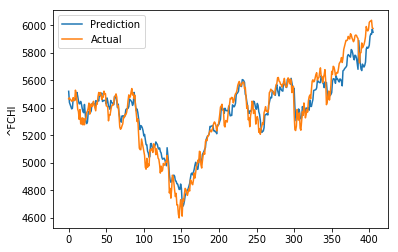

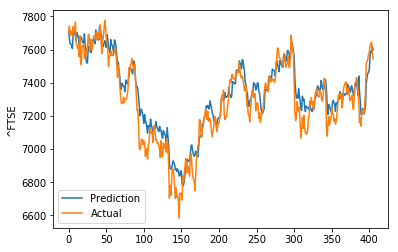

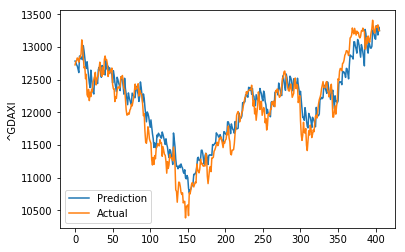

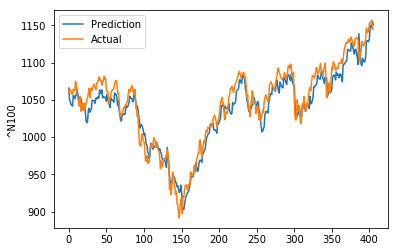

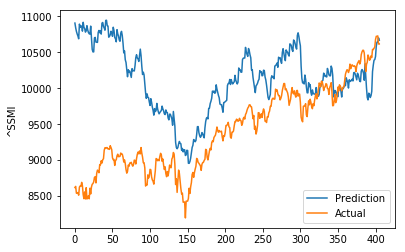

In [66]:
for ii,k in enumerate(train_prediction):#dataset_scaled.columns.tolist()):
    _=plt.figure()
    pred_i = np.array([inverse_transform_single(scaler,json.loads(train_prediction[k])['predictions'][i]['mean'][0],ii) for i in range(len(json.loads(train_prediction[k])['predictions']))])
    _=plt.plot(pred_i.T)
    actual_i = dataset[training_start:training_end][k].iloc[:].values
    _=plt.plot(actual_i)
    _=plt.ylabel(k)
    _=plt.legend(['Prediction','Actual']) 

#### Hyperparameter tuning
According the documentation, the hyper parameters are tuned according the given variable ranges

In [67]:
from sagemaker.tuner import IntegerParameter, ContinuousParameter, HyperparameterTuner
xgb_hyperparameter_tuner = HyperparameterTuner(estimator = estimator, # The estimator object to use as the basis for the training jobs.
                                               objective_metric_name = 'test:RMSE', # The metric used to compare trained models.
                                               objective_type = 'Minimize', # Whether we wish to minimize or maximize the metric.
                                               max_jobs = 6, # The total number of models to train
                                               max_parallel_jobs = 3, # The number of models to train in parallel
hyperparameter_ranges = {
    'num_cells'      : IntegerParameter(20, 50),
    'num_layers': IntegerParameter(2, 6)
    }
    )
xgb_hyperparameter_tuner.fit({'train': train_path, 'test': test_path})
xgb_hyperparameter_tuner.wait()

............................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................!


Once tuned, the best estimator is taken into account for the future predictions

In [65]:
best_estim = xgb_hyperparameter_tuner.best_estimator().deploy(initial_instance_count=1,
    instance_type='ml.t2.medium',
    content_type="application/json"
)

#For the replica of the report charts, uncomment the following lines
#best_estim=estimator.deploy(initial_instance_count=1,
#    instance_type='ml.t2.medium',
#    content_type="application/json",
#                           model_name='forecasting-deepar-200514-1301-005-9687d922')

Using already existing model: forecasting-deepar-200514-1301-005-9687d922


-----------------!

In [46]:
train_prediction={}

In [47]:
for i,stock in enumerate(dataset_scaled.columns.tolist()[:]):
    #definition of the prediction input for each index in perimeter
    train_prediction[stock] = best_estim.predict(json.dumps({"instances":[
        {'start':str(t), 
         'target':dataset_scaled[:t].iloc[-30:,i].values.tolist(), 
         'cat': [i]}
        for it,t in enumerate(dataset_scaled[training_start:training_end].index)],
            'configuration':{
            'num_samples':50,
            "output_types": ['mean']
        }}).encode('utf8'))
    print("Prediction for stock {} completed...".format(stock))

Prediction for stock ^FCHI completed...
Prediction for stock ^FTSE completed...
Prediction for stock ^GDAXI completed...
Prediction for stock ^N100 completed...
Prediction for stock ^SSMI completed...


Prediction extractions and visualization: for each index, the inverse_transform function is applied as well.

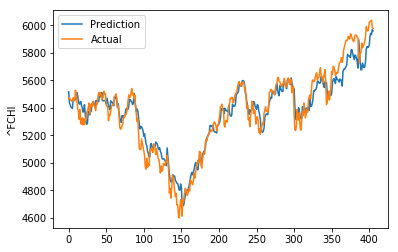

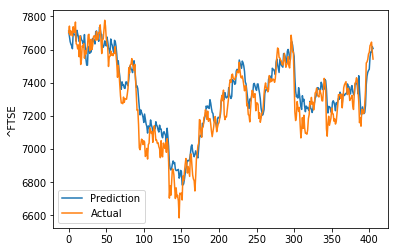

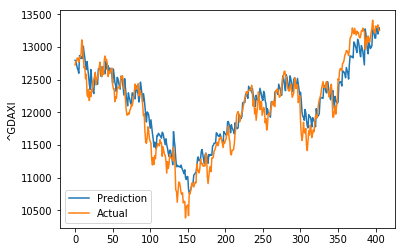

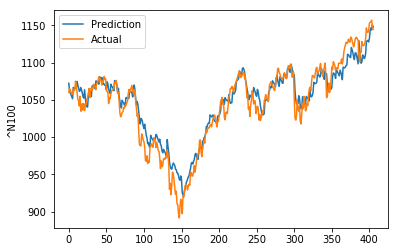

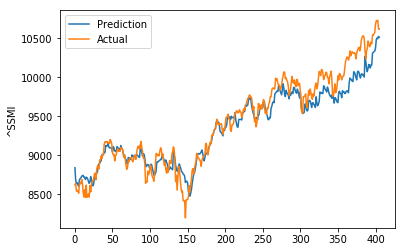

In [49]:
for ii,k in enumerate(train_prediction):
    _=plt.figure()
    pred_i = np.array([inverse_transform_single(scaler,json.loads(train_prediction[k])['predictions'][i]['mean'][0],ii) for i in range(len(json.loads(train_prediction[k])['predictions']))])
    _=plt.plot(pred_i.T)
    actual_i = dataset[training_start:training_end][k].iloc[:].values
    _=plt.plot(actual_i)
    _=plt.ylabel(k)
    _=plt.legend(['Prediction','Actual']) 

Check of the performance in terms of the predicted ditribution, taking into account two scenarios: end of June 2019 (included in the training set) and end of December 2019 (whose prediction are outside the training set)

In [13]:
start_simulation_date = [datetime.datetime.strptime('2019/06/30','%Y/%m/%d'),datetime.datetime.strptime('2019/12/31','%Y/%m/%d')]

Stock predition on the given `start_simulation_date`

In [66]:
sim_prediction={}
for i,stock in enumerate(dataset_scaled.columns):
    sim_prediction[stock] = best_estim.predict(json.dumps({"instances":[
    {'start':str(sim_date), 
     'target':dataset_scaled[:sim_date].iloc[-30:,i].values.tolist(), 
     'cat': [list(dataset_scaled.columns).index(stock)]}
     for sim_date in start_simulation_date],
'configuration':{
    'num_samples':1000,
    "output_types": ["quantiles",'samples'],
    "quantiles": ["0.05", "0.5", "0.95"]
}}).encode('utf8'))


Deleting the created endpoints

In [54]:
predictor.delete_endpoint()
best_estim.delete_endpoint()

Check on the prediction with the comparison bewteen prediction and actual prices simulated over `30` days.

In [35]:
def retrieve_full_dataset(df_stock):
    #df_stock daily fitting (used for the comparison bewteen the prediction and the actual prices)
    p_range=pd.period_range(df_stock.index[0],df_stock.index[-1])
    df_full = df_stock.reindex(p_range)
    for i in df_stock.index:
        df_full[i]=df_stock[i]
    return df_full

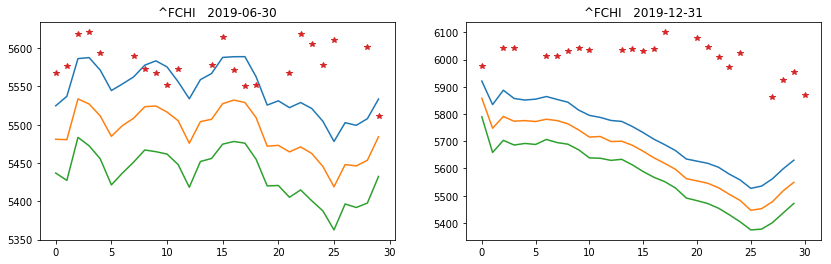

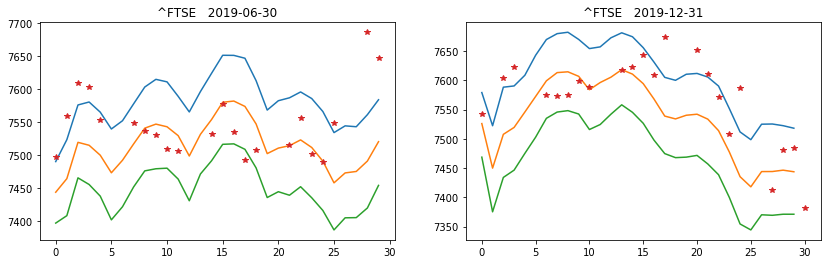

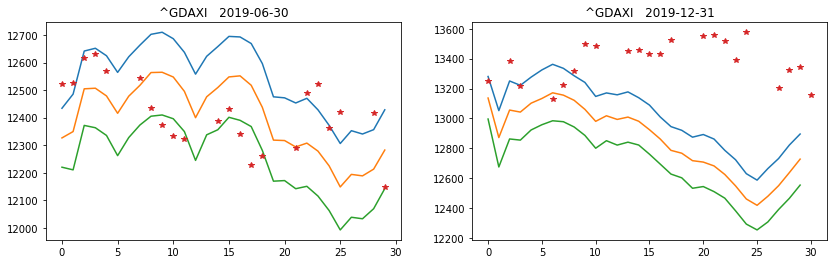

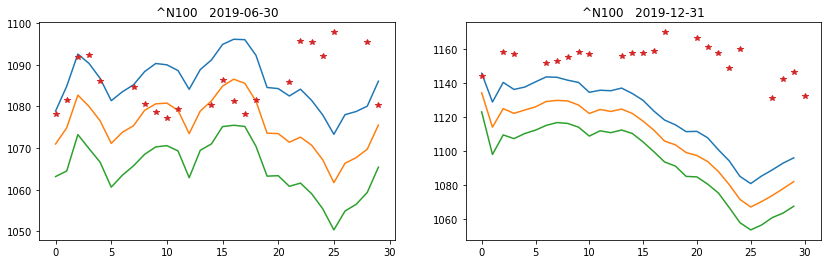

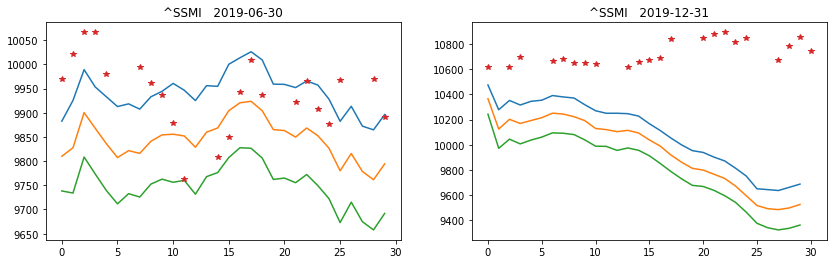

In [44]:
for k,stock in enumerate(sim_prediction):
    prediction = json.loads(sim_prediction[stock])['predictions']
    _=plt.figure(figsize=[14,4])
    for i,sim_date in enumerate(start_simulation_date):
        _=plt.subplot(121+i)
        _=plt.title(stock + '   ' + str(sim_date.strftime('%Y-%m-%d')))
        _=plt.plot(np.array([inverse_transform_single(scaler,prediction[i]['quantiles']['0.95'],k),
                    inverse_transform_single(scaler,prediction[i]['quantiles']['0.5'],k),
                    inverse_transform_single(scaler,prediction[i]['quantiles']['0.05'],k)]).T)        
        _=plt.plot(retrieve_full_dataset(dataset[sim_date:sim_date+datetime.timedelta(30)][stock]).values,'*')

## Portfolio Optimization

For both the simulation dates, the portfolio optimal solution is computed. Starting from the Expected Returns, the Sharpe Ratio (function of the Expected Value and Standard Deviatio) is optimized over the different possible allocations. The Portfolio Optimization is performed on the whole `start_simulation_date` list.

### Sharpe Ratio Definition

In [375]:
def ExcessReturn(StocksPerimeter,scaler,model_prediction,sim_date_idx):
    """
    Daily Excess Return computation
    Input:
        StocksPerimeter: list of the stocks
        scaler: scaler to be applied to the model_prediction
        model_prediction: scaled model prediction in JSON format
        sim_date_idx: index of the simulation date
    """
    exc_ret = np.zeros((1000,len(StocksPerimeter)),dtype=np.float)
    for i,stock in enumerate(StocksPerimeter):
        prediction = np.array(json.loads(model_prediction[stock])['predictions'][sim_date_idx]['samples'])
        prediction = inverse_transform_single(scaler,prediction,i)
        exc_ret[:,i] = np.log(prediction[:,-1]/np.mean(prediction[:,0]))
    exc_ret *= 1/(30)
    return exc_ret

def ExpectedValue(w,EV):
    # Portfolio Expected Value
    return np.dot(w.T,EV)

def StandardDeviation(w,COV):
    # Portfolio Standard Deviation
    return np.dot(np.dot(w.T,COV),w)**0.5

def SharpeRatio(w,EV,COV):
    #Annualized Sharpe Ratio
    ev = ExpectedValue(w,EV)
    std = StandardDeviation(w,COV)
    return (252**0.5)*ev/std

### Definition of the optimization problem

In [394]:
from scipy.optimize import minimize
constraints = ({'type':'eq','fun':lambda x: np.sum(x)-1}) #unit weights
bounds = ((0,1),(0,1),(0,1),(0,1),(0,1)) # non-negative weights
x0 = [1/len(dataset_scaled.columns)]*len(dataset_scaled.columns) #initial guess

PftMetrics = {}
# Optimization problem resolution on the simulated predictions
for sim_date in start_simulation_date:
    exc_ret = ExcessReturn(dataset_scaled.columns.tolist(),scaler,sim_prediction,start_simulation_date.index(sim_date))
    EV = np.mean(exc_ret,axis=0)
    COV = np.cov(exc_ret.T)
    PftMetrics[sim_date]={'EV': EV, 'COV': COV}
    
    optim[sim_date] = minimize(lambda x: -SharpeRatio(x,EV=EV,COV=COV),x0, method='SLSQP', bounds=bounds, constraints=constraints)
    
    print('Simulation Date {}: {}'.format(sim_date.strftime('%Y-%m-%d'),optim.message))

Simulation Date 2019-06-30: Optimization terminated successfully.
Simulation Date 2019-12-31: Optimization terminated successfully.


#### Visualization of the Optimization Domain

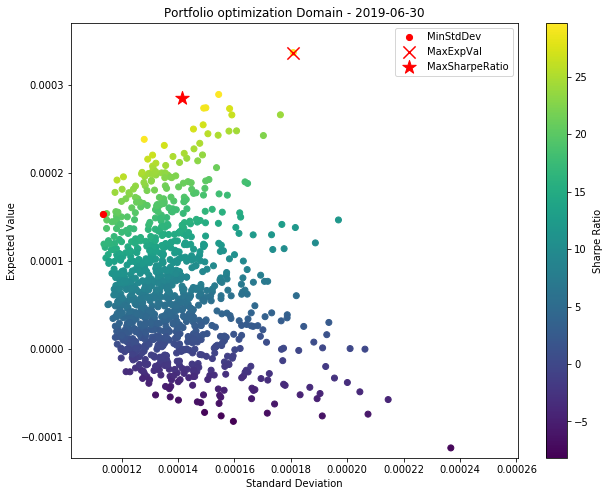

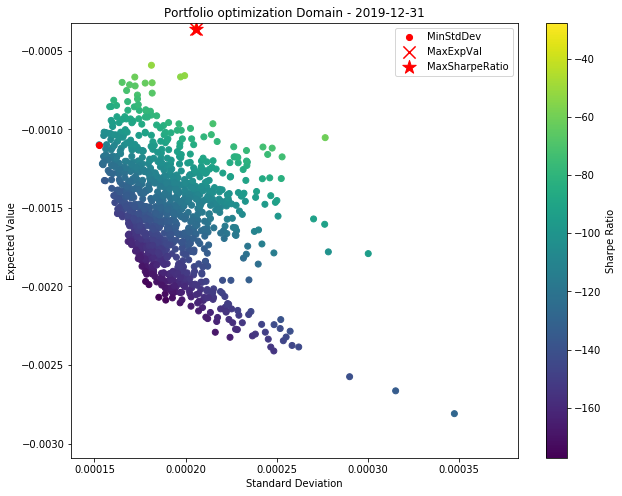

In [407]:
for sim_date in start_simulation_date:
    SR_matrix = []
    EV_matrix = []
    STD_matrix = []

    #Random generation of the weights (non negative with unit sum)
    for w in np.random.dirichlet((1,)*len(dataset.columns), size=(1000)):
        EV_matrix.append(ExpectedValue(w,EV = PftMetrics[sim_date]['EV']))
        STD_matrix.append(StandardDeviation(w,COV = PftMetrics[sim_date]['COV']))
        SR_matrix.append(SharpeRatio(w, EV = PftMetrics[sim_date]['EV'], COV = PftMetrics[sim_date]['COV']))
    #Adding the extreme cases
    for i,w in enumerate(np.zeros((5,5),dtype=np.float)):
        w[i]= 1
        EV_matrix.append(ExpectedValue(w,EV = PftMetrics[sim_date]['EV']))
        STD_matrix.append(StandardDeviation(w,COV = PftMetrics[sim_date]['COV']))
        SR_matrix.append(SharpeRatio(w, EV = PftMetrics[sim_date]['EV'], COV = PftMetrics[sim_date]['COV']))

    _=plt.figure(figsize=[10,8])
    _=plt.title("Portfolio optimization Domain - {}".format(sim_date.strftime('%Y-%m-%d')))
    _=plt.scatter(STD_matrix,EV_matrix,c=SR_matrix)
    _=plt.colorbar(label='Sharpe Ratio')
    _=plt.xlim([min(STD_matrix)*.9,max(STD_matrix)*1.1])
    _=plt.ylim([min(EV_matrix)*(1.1 if min(EV_matrix)<0 else .9),max(EV_matrix)*(.9 if max(EV_matrix)<0 else 1.1)])
    
    #highlighting min STD
    min_STD = np.argmin(STD_matrix)
    l0=plt.scatter(STD_matrix[min_STD],EV_matrix[min_STD],c='red',marker='.',s=150)
    #highlihting max EV
    max_EV = np.argmax(EV_matrix)
    l1=plt.scatter(STD_matrix[max_EV],EV_matrix[max_EV],c='red',marker='x',s=150)
    #higlighting optimal solution
    l2=plt.scatter(StandardDeviation(optim[sim_date].x,COV=PftMetrics[sim_date]['COV']),
                  ExpectedValue(optim[sim_date].x,EV=PftMetrics[sim_date]['EV']),
                  c='red',marker='*',s=200)
    _=plt.legend((l0,l1,l2),('MinStdDev','MaxExpVal','MaxSharpeRatio'))
    _=plt.xlabel('Standard Deviation')
    _=plt.ylabel('Expected Value')